In [2]:
# Chapter 5: Automated Feature Engineering and Data Preprocessing
# Complete RetailMart Dataset Examples

"""
This notebook provides complete examples for Chapter 5 using the RetailMart e-commerce dataset.

DEPENDENCIES:
- Required: pandas, numpy, scikit-learn, matplotlib, scipy
- Optional (with fallbacks): ydata-profiling, category_encoders, nltk, textblob

To install optional dependencies:
pip install ydata-profiling category_encoders nltk textblob

The notebook will automatically detect available libraries and provide fallbacks
for missing optional dependencies, so it will run with just the basic requirements.
"""

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import string
import warnings
warnings.filterwarnings('ignore')

print("Chapter 5: Automated Feature Engineering and Data Preprocessing")
print("=" * 60)
print("Using RetailMart E-commerce Dataset")
print("Dependencies loaded successfully!")
print()


Chapter 5: Automated Feature Engineering and Data Preprocessing
Using RetailMart E-commerce Dataset
Dependencies loaded successfully!



In [3]:

# ============================================================================
# CELL 1: Create RetailMart Dataset
# ============================================================================

def create_retailmart_dataset(n_products=5000, n_reviews=15000):
    """Create comprehensive RetailMart e-commerce dataset"""
    np.random.seed(42)
    random.seed(42)
    
    # Product categories and their typical price ranges
    categories = {
        'Electronics': (50, 2000),
        'Clothing': (15, 300),
        'Home & Kitchen': (10, 500),
        'Books': (5, 50),
        'Sports & Outdoors': (20, 800),
        'Health & Beauty': (8, 150),
        'Toys & Games': (10, 200)
    }
    
    # Generate product data
    products_data = []
    for i in range(n_products):
        category = np.random.choice(list(categories.keys()))
        price_range = categories[category]
        
        # Base price with some variance
        base_price = np.random.uniform(price_range[0], price_range[1])
        
        # Introduce price outliers (some incorrectly entered prices)
        if np.random.random() < 0.02:  # 2% outliers
            base_price = base_price * np.random.choice([0.01, 100])  # Very low or very high
        
        product = {
            'product_id': f'PROD_{i:06d}',
            'category': category,
            'price': round(base_price, 2),
            'brand': np.random.choice([
                'TechCorp', 'FashionPlus', 'HomeStyle', 'ReadMore', 'SportsPro',
                'BeautyMax', 'PlayTime', 'GenericBrand', 'PremiumCo', 'BudgetBest'
            ]),
            'weight_kg': max(0.1, np.random.lognormal(0, 1)),
            'dimensions_cm': f"{np.random.randint(5, 100)}x{np.random.randint(5, 100)}x{np.random.randint(5, 100)}",
            'color': np.random.choice([
                'Black', 'White', 'Red', 'Blue', 'Green', 'Yellow', 'Gray', 'Brown',
                'Pink', 'Purple', 'Orange', 'Multi-Color', None  # Some missing colors
            ]),
            'stock_quantity': np.random.poisson(50),
            'supplier_id': f'SUP_{np.random.randint(1, 100):03d}',
            'created_date': datetime.now() - timedelta(days=np.random.randint(1, 730))
        }
        
        # Introduce missing values realistically
        if np.random.random() < 0.05:  # 5% missing colors
            product['color'] = None
        if np.random.random() < 0.03:  # 3% missing weights
            product['weight_kg'] = None
        if np.random.random() < 0.01:  # 1% missing dimensions
            product['dimensions_cm'] = None
            
        products_data.append(product)
    
    products_df = pd.DataFrame(products_data)
    
    # Generate product descriptions (text data)
    descriptions = []
    for _, product in products_df.iterrows():
        category = product['category']
        brand = product['brand']
        
        # Category-specific description templates
        if category == 'Electronics':
            desc_templates = [
                f"High-quality {brand} electronic device with advanced features and reliability.",
                f"Professional-grade {brand} electronics perfect for tech enthusiasts.",
                f"Innovative {brand} technology designed for modern lifestyles.",
                f"Premium {brand} electronic product with cutting-edge specifications."
            ]
        elif category == 'Clothing':
            desc_templates = [
                f"Stylish {brand} apparel made from comfortable, high-quality materials.",
                f"Trendy {brand} clothing perfect for any occasion and season.",
                f"Fashionable {brand} wear that combines style with comfort.",
                f"Premium {brand} clothing designed for the modern wardrobe."
            ]
        elif category == 'Home & Kitchen':
            desc_templates = [
                f"Essential {brand} home product for modern kitchen and living spaces.",
                f"Durable {brand} household item designed for everyday convenience.",
                f"Quality {brand} home solution that enhances your living experience.",
                f"Practical {brand} kitchen accessory for efficient home management."
            ]
        else:
            desc_templates = [
                f"Excellent {brand} {category.lower()} product with outstanding quality.",
                f"Premium {brand} item perfect for enthusiasts and professionals.",
                f"High-performance {brand} product designed for reliability.",
                f"Quality {brand} {category.lower()} item with great value."
            ]
        
        description = np.random.choice(desc_templates)
        
        # Add some variation and occasional quality issues
        if np.random.random() < 0.1:  # 10% have additional details
            description += " Features include advanced functionality and premium materials."
        if np.random.random() < 0.05:  # 5% have typos or issues
            description = description.replace('quality', 'qualtiy')  # Typo
            description = description.replace('the', 'teh')  # Another typo
        if np.random.random() < 0.02:  # 2% very short descriptions
            description = f"{brand} {category.lower()} item."
            
        descriptions.append(description)
    
    products_df['description'] = descriptions
    
    # Generate customer reviews (more text data)
    reviews_data = []
    for i in range(n_reviews):
        product_id = np.random.choice(products_df['product_id'])
        
        # Rating influences review sentiment
        rating = np.random.choice([1, 2, 3, 4, 5], p=[0.05, 0.10, 0.20, 0.35, 0.30])
        
        if rating >= 4:
            review_templates = [
                "Great product! Exactly what I was looking for.",
                "Excellent quality and fast shipping. Highly recommend!",
                "Love this item. Works perfectly and good value for money.",
                "Amazing product! Exceeded my expectations completely.",
                "Perfect! Great quality and arrived quickly."
            ]
        elif rating == 3:
            review_templates = [
                "Decent product. Does the job but nothing special.",
                "It's okay. Quality is average for the price.",
                "Not bad, but not great either. Average experience.",
                "Product works as expected. Nothing to complain about.",
                "Adequate quality. Meets basic expectations."
            ]
        else:
            review_templates = [
                "Disappointed with this purchase. Poor quality.",
                "Not worth the money. Had issues from day one.",
                "Terrible product. Would not recommend to anyone.",
                "Waste of money. Product broke after few uses.",
                "Very poor quality. Completely unsatisfied."
            ]
        
        review_text = np.random.choice(review_templates)
        
        # Add some variation
        if np.random.random() < 0.3:  # 30% add extra details
            if rating >= 4:
                review_text += " Will definitely buy again!"
            else:
                review_text += " Looking for alternatives."
        
        review = {
            'review_id': f'REV_{i:08d}',
            'product_id': product_id,
            'rating': rating,
            'review_text': review_text,
            'review_date': datetime.now() - timedelta(days=np.random.randint(1, 365)),
            'verified_purchase': np.random.choice([True, False], p=[0.8, 0.2])
        }
        reviews_data.append(review)
    
    reviews_df = pd.DataFrame(reviews_data)
    
    # Generate sales time series data
    start_date = datetime.now() - timedelta(days=365)
    sales_data = []
    
    for product_id in products_df['product_id'].head(1000):  # Sales data for subset
        current_date = start_date
        while current_date <= datetime.now():
            # Seasonal and trend effects
            day_of_year = current_date.timetuple().tm_yday
            seasonal_multiplier = 1 + 0.3 * np.sin(2 * np.pi * day_of_year / 365)
            
            # Weekly pattern (weekends different)
            weekend_multiplier = 1.2 if current_date.weekday() >= 5 else 1.0
            
            # Base sales with noise
            base_sales = max(0, np.random.poisson(3) * seasonal_multiplier * weekend_multiplier)
            
            if base_sales > 0:  # Only record if there were sales
                sales_data.append({
                    'product_id': product_id,
                    'date': current_date,
                    'units_sold': base_sales,
                    'revenue': base_sales * products_df[products_df['product_id'] == product_id]['price'].iloc[0]
                })
            
            current_date += timedelta(days=1)
    
    sales_df = pd.DataFrame(sales_data)
    
    # Generate simulated image metadata
    image_data = []
    for product_id in products_df['product_id']:
        # Simulate image characteristics
        image_info = {
            'product_id': product_id,
            'image_url': f"https://retailmart.com/images/{product_id}.jpg",
            'image_width': np.random.choice([800, 1024, 1200, 1600]),
            'image_height': np.random.choice([600, 768, 900, 1200]),
            'file_size_kb': np.random.randint(50, 500),
            'has_multiple_views': np.random.choice([True, False], p=[0.7, 0.3]),
            'image_quality_score': np.random.uniform(0.6, 1.0),  # Quality assessment
            'dominant_color': np.random.choice(['white', 'black', 'blue', 'red', 'gray', 'green'])
        }
        
        # Some products missing images
        if np.random.random() < 0.05:  # 5% missing images
            image_info['image_url'] = None
            image_info['image_quality_score'] = None
            
        image_data.append(image_info)
    
    images_df = pd.DataFrame(image_data)
    
    print(f"Created RetailMart dataset:")
    print(f"  Products: {len(products_df):,}")
    print(f"  Reviews: {len(reviews_df):,}")
    print(f"  Sales records: {len(sales_df):,}")
    print(f"  Image metadata: {len(images_df):,}")
    
    return products_df, reviews_df, sales_df, images_df

# Create our RetailMart dataset
products_df, reviews_df, sales_df, images_df = create_retailmart_dataset()

# Display basic information about our dataset
print("\n=== RetailMart Dataset Overview ===")
print("\nProducts DataFrame:")
print(products_df.head())
print(f"\nShape: {products_df.shape}")
print(f"Missing values:\n{products_df.isnull().sum()}")

print("\nReviews DataFrame:")
print(reviews_df.head())
print(f"\nShape: {reviews_df.shape}")

print("\nSales DataFrame:")
print(sales_df.head())
print(f"\nShape: {sales_df.shape}")

print("\nImages DataFrame:")
print(images_df.head())
print(f"\nShape: {images_df.shape}")



Created RetailMart dataset:
  Products: 5,000
  Reviews: 15,000
  Sales records: 347,645
  Image metadata: 5,000

=== RetailMart Dataset Overview ===

Products DataFrame:
    product_id         category   price         brand  weight_kg  \
0  PROD_000000     Toys & Games  161.34  GenericBrand   0.328940   
1  PROD_000001  Health & Beauty    8.11      TechCorp   1.375617   
2  PROD_000002  Health & Beauty   20.87      PlayTime   0.975841   
3  PROD_000003     Toys & Games   42.94   FashionPlus   1.426967   
4  PROD_000004  Health & Beauty  111.27      PlayTime        NaN   

  dimensions_cm   color  stock_quantity supplier_id  \
0      87x91x79    None              59     SUP_024   
1      80x62x26    None              49     SUP_059   
2      55x11x25    Pink              46     SUP_084   
3        8x6x10  Yellow              51     SUP_063   
4      89x84x86   Green              52     SUP_029   

                created_date  \
0 2025-01-27 17:49:06.436587   
1 2024-01-13 17:49:06.436

=== RETAILMART DATASET EXPLORATORY DATA ANALYSIS ===

1. DATASET OVERVIEW
--------------------------------------------------
Products: 5,000 records
Reviews: 15,000 records
Sales: 347,645 records
Images: 5,000 records

2. PRODUCTS ANALYSIS
--------------------------------------------------


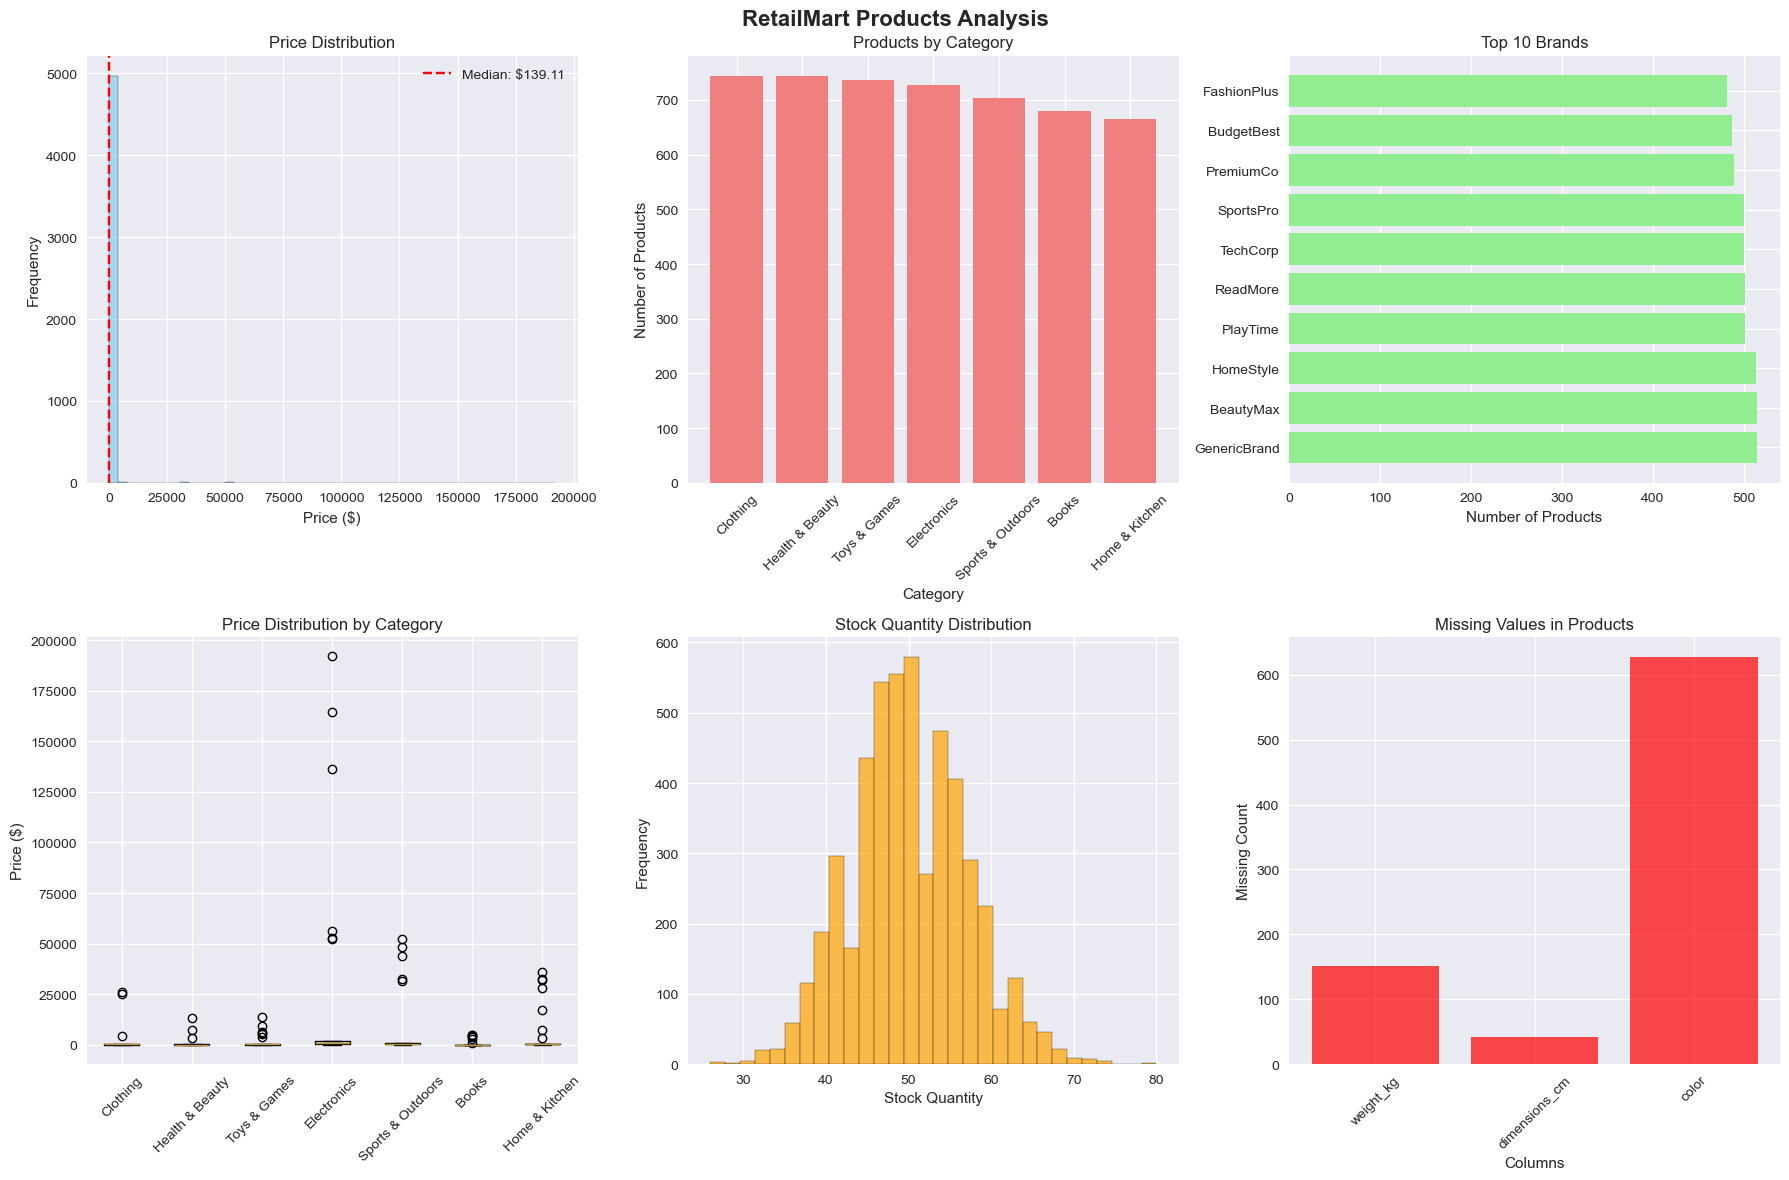


3. REVIEWS ANALYSIS
--------------------------------------------------


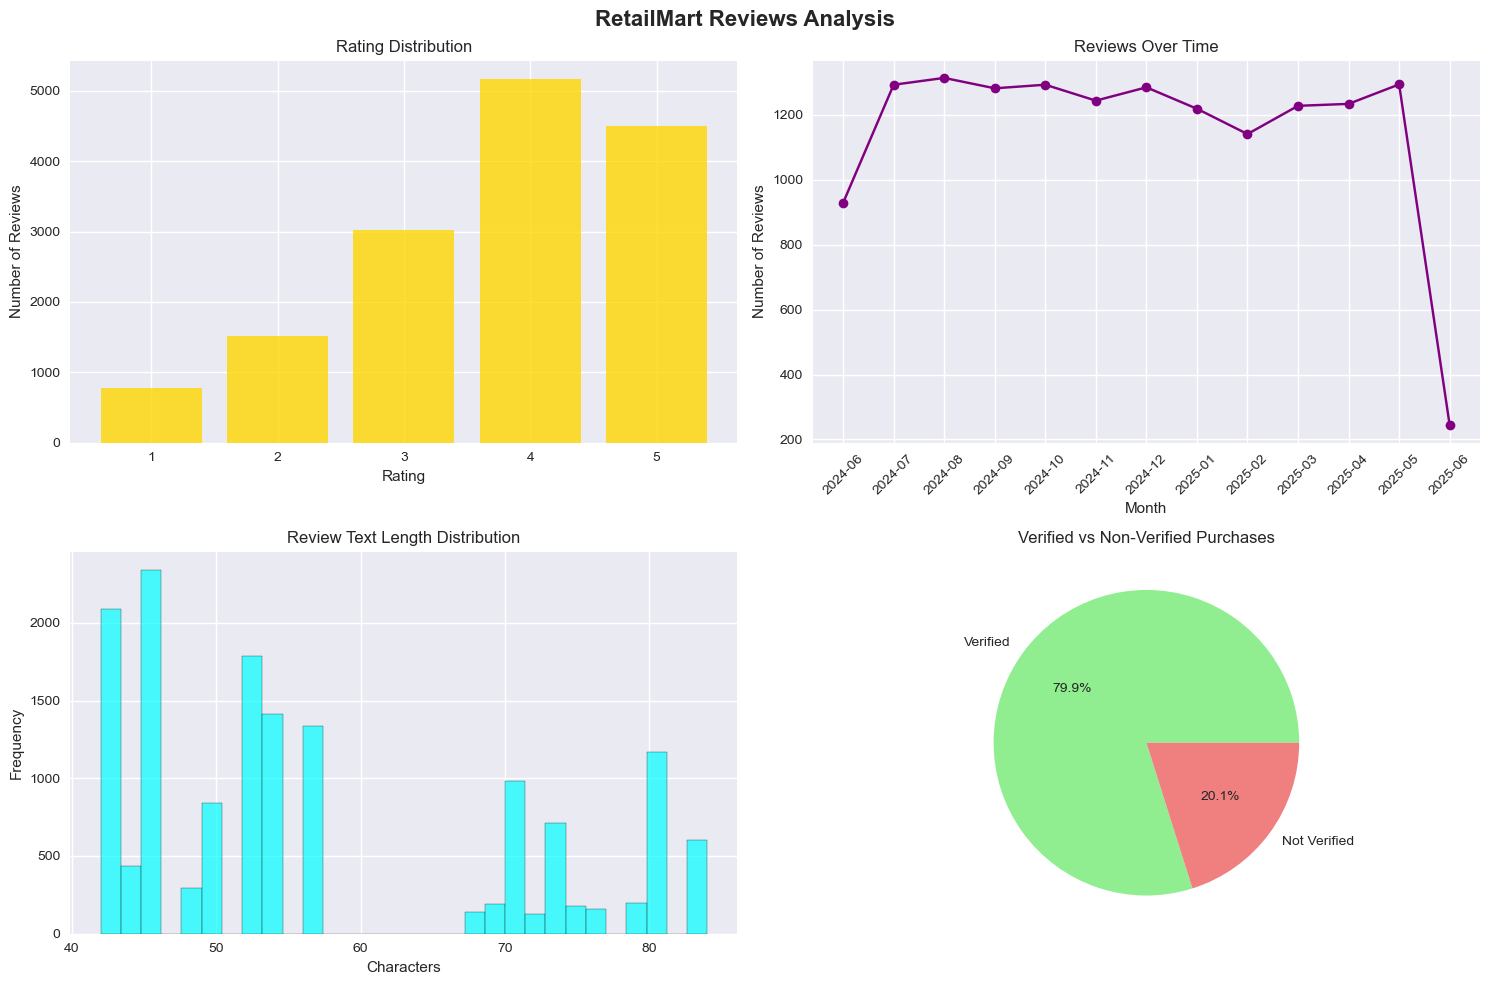


4. SALES ANALYSIS
--------------------------------------------------


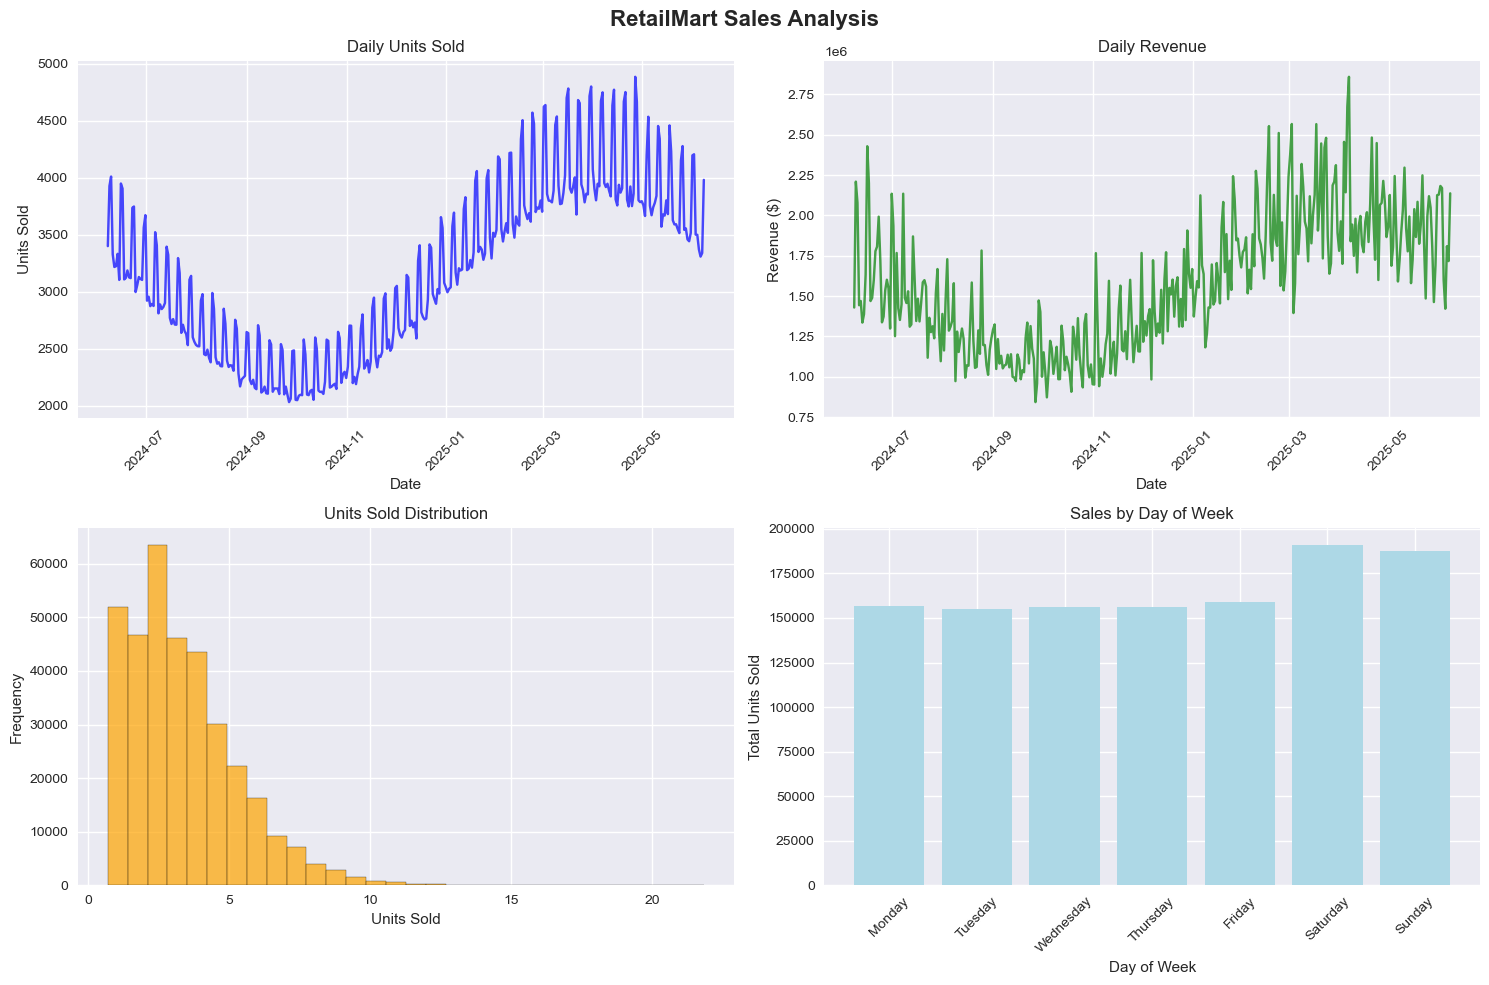


5. CROSS-DATASET ANALYSIS
--------------------------------------------------


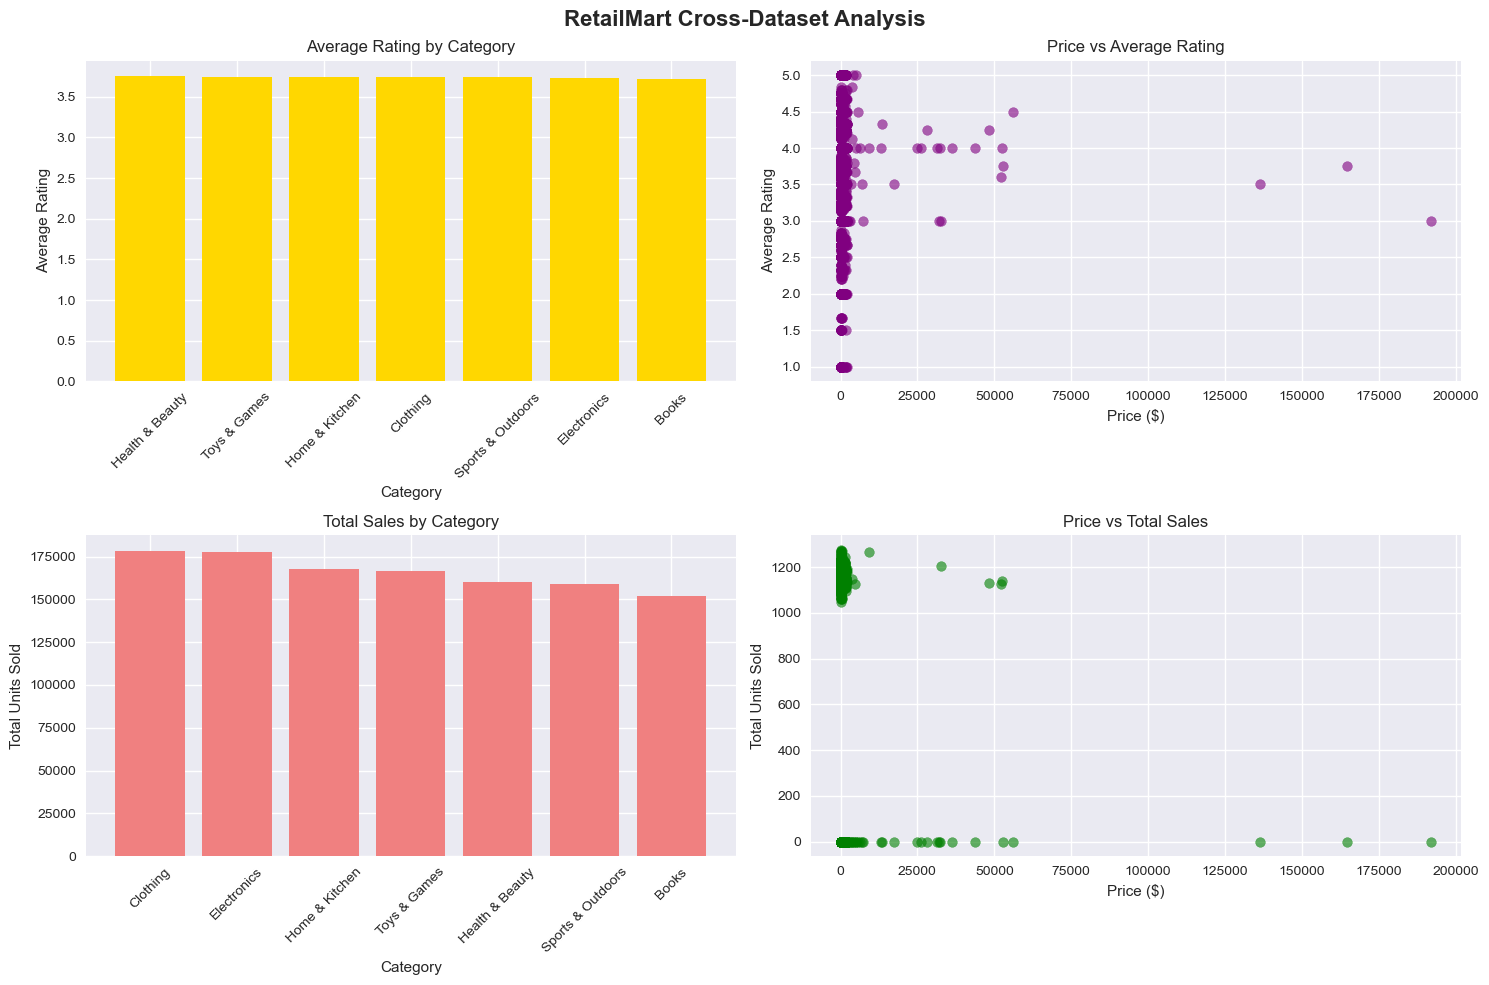


6. DATA QUALITY SUMMARY
--------------------------------------------------

Products Data Quality:
  Shape: (5000, 11)
  Missing values: 819
  Duplicate rows: 0
  Numeric columns: 3
  Potential outliers (>3 std): 120

Reviews Data Quality:
  Shape: (15000, 8)
  Missing values: 0
  Duplicate rows: 0
  Numeric columns: 2
  Potential outliers (>3 std): 0

Sales Data Quality:
  Shape: (347645, 5)
  Missing values: 0
  Duplicate rows: 0
  Numeric columns: 2
  Potential outliers (>3 std): 5268

Images Data Quality:
  Shape: (5000, 8)
  Missing values: 586
  Duplicate rows: 0
  Numeric columns: 4
  Potential outliers (>3 std): 0


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create our RetailMart dataset (using the existing function)
#products_df, reviews_df, sales_df, images_df = create_retailmart_dataset()

# Comprehensive EDA for RetailMart Dataset
def perform_retailmart_eda():
    """Comprehensive exploratory data analysis of RetailMart dataset"""
    
    print("=== RETAILMART DATASET EXPLORATORY DATA ANALYSIS ===\n")
    
    # 1. Dataset Overview
    print("1. DATASET OVERVIEW")
    print("-" * 50)
    print(f"Products: {len(products_df):,} records")
    print(f"Reviews: {len(reviews_df):,} records") 
    print(f"Sales: {len(sales_df):,} records")
    print(f"Images: {len(images_df):,} records")
    
    # 2. Products Analysis
    print(f"\n2. PRODUCTS ANALYSIS")
    print("-" * 50)
    
    # Create subplots for products analysis
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('RetailMart Products Analysis', fontsize=16, fontweight='bold')
    
    # Price distribution
    axes[0,0].hist(products_df['price'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0,0].set_title('Price Distribution')
    axes[0,0].set_xlabel('Price ($)')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].axvline(products_df['price'].median(), color='red', linestyle='--', 
                      label=f'Median: ${products_df["price"].median():.2f}')
    axes[0,0].legend()
    
    # Category distribution
    category_counts = products_df['category'].value_counts()
    axes[0,1].bar(category_counts.index, category_counts.values, color='lightcoral')
    axes[0,1].set_title('Products by Category')
    axes[0,1].set_xlabel('Category')
    axes[0,1].set_ylabel('Number of Products')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # Brand distribution (top 10)
    brand_counts = products_df['brand'].value_counts().head(10)
    axes[0,2].barh(brand_counts.index, brand_counts.values, color='lightgreen')
    axes[0,2].set_title('Top 10 Brands')
    axes[0,2].set_xlabel('Number of Products')
    
    # Price by category boxplot
    axes[1,0].boxplot([products_df[products_df['category'] == cat]['price'].values 
                       for cat in category_counts.index], 
                      labels=category_counts.index)
    axes[1,0].set_title('Price Distribution by Category')
    axes[1,0].set_ylabel('Price ($)')
    axes[1,0].tick_params(axis='x', rotation=45)
    
    # Stock quantity distribution
    axes[1,1].hist(products_df['stock_quantity'], bins=30, alpha=0.7, color='orange', edgecolor='black')
    axes[1,1].set_title('Stock Quantity Distribution')
    axes[1,1].set_xlabel('Stock Quantity')
    axes[1,1].set_ylabel('Frequency')
    
    # Missing values heatmap
    missing_data = products_df.isnull().sum()
    missing_data = missing_data[missing_data > 0]
    if len(missing_data) > 0:
        axes[1,2].bar(range(len(missing_data)), missing_data.values, color='red', alpha=0.7)
        axes[1,2].set_title('Missing Values in Products')
        axes[1,2].set_xlabel('Columns')
        axes[1,2].set_ylabel('Missing Count')
        axes[1,2].set_xticks(range(len(missing_data)))
        axes[1,2].set_xticklabels(missing_data.index, rotation=45)
    else:
        axes[1,2].text(0.5, 0.5, 'No Missing Values', ha='center', va='center', 
                       transform=axes[1,2].transAxes, fontsize=14)
        axes[1,2].set_title('Missing Values in Products')
    
    plt.tight_layout()
    plt.show()
    
    # 3. Reviews Analysis
    print(f"\n3. REVIEWS ANALYSIS")
    print("-" * 50)
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('RetailMart Reviews Analysis', fontsize=16, fontweight='bold')
    
    # Rating distribution
    rating_counts = reviews_df['rating'].value_counts().sort_index()
    axes[0,0].bar(rating_counts.index, rating_counts.values, color='gold', alpha=0.8)
    axes[0,0].set_title('Rating Distribution')
    axes[0,0].set_xlabel('Rating')
    axes[0,0].set_ylabel('Number of Reviews')
    
    # Reviews over time
    reviews_df['review_month'] = pd.to_datetime(reviews_df['review_date']).dt.to_period('M')
    monthly_reviews = reviews_df.groupby('review_month').size()
    axes[0,1].plot(monthly_reviews.index.astype(str), monthly_reviews.values, marker='o', color='purple')
    axes[0,1].set_title('Reviews Over Time')
    axes[0,1].set_xlabel('Month')
    axes[0,1].set_ylabel('Number of Reviews')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # Review text length distribution
    reviews_df['review_length'] = reviews_df['review_text'].str.len()
    axes[1,0].hist(reviews_df['review_length'], bins=30, alpha=0.7, color='cyan', edgecolor='black')
    axes[1,0].set_title('Review Text Length Distribution')
    axes[1,0].set_xlabel('Characters')
    axes[1,0].set_ylabel('Frequency')
    
    # Verified vs Non-verified purchases
    verified_counts = reviews_df['verified_purchase'].value_counts()
    axes[1,1].pie(verified_counts.values, labels=['Verified', 'Not Verified'], 
                  autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
    axes[1,1].set_title('Verified vs Non-Verified Purchases')
    
    plt.tight_layout()
    plt.show()
    
    # 4. Sales Analysis
    print(f"\n4. SALES ANALYSIS")
    print("-" * 50)
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('RetailMart Sales Analysis', fontsize=16, fontweight='bold')
    
    # Daily sales trend
    daily_sales = sales_df.groupby('date').agg({'units_sold': 'sum', 'revenue': 'sum'})
    axes[0,0].plot(daily_sales.index, daily_sales['units_sold'], color='blue', alpha=0.7)
    axes[0,0].set_title('Daily Units Sold')
    axes[0,0].set_xlabel('Date')
    axes[0,0].set_ylabel('Units Sold')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # Revenue trend
    axes[0,1].plot(daily_sales.index, daily_sales['revenue'], color='green', alpha=0.7)
    axes[0,1].set_title('Daily Revenue')
    axes[0,1].set_xlabel('Date')
    axes[0,1].set_ylabel('Revenue ($)')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # Units sold distribution
    axes[1,0].hist(sales_df['units_sold'], bins=30, alpha=0.7, color='orange', edgecolor='black')
    axes[1,0].set_title('Units Sold Distribution')
    axes[1,0].set_xlabel('Units Sold')
    axes[1,0].set_ylabel('Frequency')
    
    # Day of week sales pattern
    sales_df['day_of_week'] = pd.to_datetime(sales_df['date']).dt.day_name()
    dow_sales = sales_df.groupby('day_of_week')['units_sold'].sum()
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    dow_sales = dow_sales.reindex(day_order)
    axes[1,1].bar(dow_sales.index, dow_sales.values, color='lightblue')
    axes[1,1].set_title('Sales by Day of Week')
    axes[1,1].set_xlabel('Day of Week')
    axes[1,1].set_ylabel('Total Units Sold')
    axes[1,1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # 5. Cross-Dataset Analysis
    print(f"\n5. CROSS-DATASET ANALYSIS")
    print("-" * 50)
    
    # Merge datasets for analysis
    products_reviews = products_df.merge(reviews_df, on='product_id', how='left')
    products_sales = products_df.merge(sales_df, on='product_id', how='left')
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('RetailMart Cross-Dataset Analysis', fontsize=16, fontweight='bold')
    
    # Average rating by category
    avg_rating_by_category = products_reviews.groupby('category')['rating'].mean().sort_values(ascending=False)
    axes[0,0].bar(avg_rating_by_category.index, avg_rating_by_category.values, color='gold')
    axes[0,0].set_title('Average Rating by Category')
    axes[0,0].set_xlabel('Category')
    axes[0,0].set_ylabel('Average Rating')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # Price vs Rating scatter
    price_rating = products_reviews.groupby('product_id').agg({
        'price': 'first', 'rating': 'mean'
    }).dropna()
    axes[0,1].scatter(price_rating['price'], price_rating['rating'], alpha=0.6, color='purple')
    axes[0,1].set_title('Price vs Average Rating')
    axes[0,1].set_xlabel('Price ($)')
    axes[0,1].set_ylabel('Average Rating')
    
    # Sales by category
    category_sales = products_sales.groupby('category')['units_sold'].sum().sort_values(ascending=False)
    axes[1,0].bar(category_sales.index, category_sales.values, color='lightcoral')
    axes[1,0].set_title('Total Sales by Category')
    axes[1,0].set_xlabel('Category')
    axes[1,0].set_ylabel('Total Units Sold')
    axes[1,0].tick_params(axis='x', rotation=45)
    
    # Price vs Sales correlation
    price_sales = products_sales.groupby('product_id').agg({
        'price': 'first', 'units_sold': 'sum'
    }).dropna()
    axes[1,1].scatter(price_sales['price'], price_sales['units_sold'], alpha=0.6, color='green')
    axes[1,1].set_title('Price vs Total Sales')
    axes[1,1].set_xlabel('Price ($)')
    axes[1,1].set_ylabel('Total Units Sold')
    
    plt.tight_layout()
    plt.show()
    
    # 6. Data Quality Summary
    print(f"\n6. DATA QUALITY SUMMARY")
    print("-" * 50)
    
    def analyze_data_quality(df, df_name):
        print(f"\n{df_name} Data Quality:")
        print(f"  Shape: {df.shape}")
        print(f"  Missing values: {df.isnull().sum().sum()}")
        print(f"  Duplicate rows: {df.duplicated().sum()}")
        
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        if len(numeric_cols) > 0:
            print(f"  Numeric columns: {len(numeric_cols)}")
            print(f"  Potential outliers (>3 std): {((np.abs(df[numeric_cols] - df[numeric_cols].mean()) > 3 * df[numeric_cols].std()).sum().sum())}")
    
    analyze_data_quality(products_df, "Products")
    analyze_data_quality(reviews_df, "Reviews") 
    analyze_data_quality(sales_df, "Sales")
    analyze_data_quality(images_df, "Images")
    
    return {
        'products_summary': products_df.describe(),
        'reviews_summary': reviews_df.describe(),
        'sales_summary': sales_df.describe(),
        'category_distribution': products_df['category'].value_counts(),
        'avg_rating_by_category': avg_rating_by_category,
        'total_sales_by_category': category_sales
    }

# Perform the EDA
eda_results = perform_retailmart_eda()

In [5]:

# ============================================================================
# CELL 2: Intelligent Data Profiling - RetailMart Products
# ============================================================================

# Try ydata-profiling (new name for pandas-profiling) or fall back to basic profiling
try:
    from ydata_profiling import ProfileReport
    
    print("=== RetailMart Products Data Profiling with ydata-profiling ===")
    
    # Generate comprehensive profile report for RetailMart products
    profile = ProfileReport(
        products_df,
        title="RetailMart Products Data Profile",
        explorative=True
    )
    
    # For notebook display - uncomment the next line to show interactive report
    # profile.to_notebook_iframe()
    
    print("Profile report generated successfully!")
    print("Note: In Jupyter, use profile.to_notebook_iframe() to display interactive report")
    
except ImportError:
    print("ydata-profiling not available, using comprehensive manual profiling")

# Comprehensive manual profiling that works without external dependencies
print("\n=== RetailMart Products Comprehensive Profiling ===")

def comprehensive_profile(df, title="Dataset Profile"):
    """Comprehensive data profiling without external dependencies"""
    print(f"\n{title}")
    print("=" * len(title))
    
    print(f"\nDataset Shape: {df.shape}")
    print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    print("\n--- Column Analysis ---")
    for col in df.columns:
        print(f"\nColumn: {col}")
        print(f"  Data type: {df[col].dtype}")
        print(f"  Non-null count: {df[col].count():,} ({df[col].count()/len(df)*100:.1f}%)")
        print(f"  Missing count: {df[col].isnull().sum():,} ({df[col].isnull().mean()*100:.1f}%)")
        print(f"  Unique values: {df[col].nunique():,}")
        print(f"  Cardinality ratio: {df[col].nunique()/len(df):.3f}")
        
        if df[col].dtype in ['object', 'category']:
            print(f"  Type: Categorical")
            value_counts = df[col].value_counts()
            print(f"  Top 3 values: {dict(value_counts.head(3))}")
            if df[col].nunique() > 10:
                print(f"  High cardinality categorical (consider encoding)")
                
        elif df[col].dtype in ['int64', 'float64']:
            print(f"  Type: Numerical")
            print(f"  Range: {df[col].min():.2f} to {df[col].max():.2f}")
            print(f"  Mean: {df[col].mean():.2f}")
            print(f"  Std: {df[col].std():.2f}")
            print(f"  Skewness: {df[col].skew():.2f}")
            
            # Check for potential categorical encoded as numeric
            if df[col].nunique() < 20 and df[col].dtype == 'int64':
                print(f"  ⚠️  Low cardinality integer - might be categorical")
                
        elif 'datetime' in str(df[col].dtype):
            print(f"  Type: Datetime")
            print(f"  Range: {df[col].min()} to {df[col].max()}")
            
    print("\n--- Missing Value Patterns ---")
    missing_summary = df.isnull().sum().sort_values(ascending=False)
    missing_summary = missing_summary[missing_summary > 0]
    
    if len(missing_summary) > 0:
        for col, missing_count in missing_summary.items():
            missing_pct = missing_count / len(df) * 100
            print(f"  {col}: {missing_count:,} missing ({missing_pct:.1f}%)")
    else:
        print("  No missing values detected")
        
    print("\n--- Data Quality Issues ---")
    quality_issues = []
    
    for col in df.select_dtypes(include=[np.number]).columns:
        # Check for outliers using IQR method
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
        if outliers > 0:
            quality_issues.append(f"{col}: {outliers} potential outliers ({outliers/len(df)*100:.1f}%)")
    
    # Check for duplicates
    total_duplicates = df.duplicated().sum()
    if total_duplicates > 0:
        quality_issues.append(f"Dataset: {total_duplicates} duplicate rows ({total_duplicates/len(df)*100:.1f}%)")
    
    if quality_issues:
        for issue in quality_issues:
            print(f"  ⚠️  {issue}")
    else:
        print("  No major quality issues detected")

# Apply comprehensive profiling to RetailMart products
comprehensive_profile(products_df, "RetailMart Products Dataset")



=== RetailMart Products Data Profiling with ydata-profiling ===
Profile report generated successfully!
Note: In Jupyter, use profile.to_notebook_iframe() to display interactive report

=== RetailMart Products Comprehensive Profiling ===

RetailMart Products Dataset

Dataset Shape: (5000, 11)
Memory Usage: 2.68 MB

--- Column Analysis ---

Column: product_id
  Data type: object
  Non-null count: 5,000 (100.0%)
  Missing count: 0 (0.0%)
  Unique values: 5,000
  Cardinality ratio: 1.000
  Type: Categorical
  Top 3 values: {'PROD_000000': 1, 'PROD_003330': 1, 'PROD_003337': 1}
  High cardinality categorical (consider encoding)

Column: category
  Data type: object
  Non-null count: 5,000 (100.0%)
  Missing count: 0 (0.0%)
  Unique values: 7
  Cardinality ratio: 0.001
  Type: Categorical
  Top 3 values: {'Clothing': 744, 'Health & Beauty': 743, 'Toys & Games': 736}

Column: price
  Data type: float64
  Non-null count: 5,000 (100.0%)
  Missing count: 0 (0.0%)
  Unique values: 4,720
  Cardina

In [6]:

# ============================================================================
# CELL 3: Data Quality Assessment with Validation Rules - RetailMart
# ============================================================================

# Custom data validation implementation (no external dependencies required)
print("=== RetailMart Data Quality Validation ===")

class DataQualityValidator:
    """Custom data quality validator for RetailMart products"""
    
    def __init__(self):
        self.validation_results = []
        self.passed_tests = 0
        self.failed_tests = 0
    
    def expect_column_values_to_not_be_null(self, df, column, mostly=1.0):
        """Expect column values to not be null"""
        null_count = df[column].isnull().sum()
        null_rate = null_count / len(df)
        success = null_rate <= (1 - mostly)
        
        result = {
            'expectation': f'expect_{column}_values_to_not_be_null',
            'success': success,
            'observed_value': f'{null_count} nulls ({null_rate:.2%})',
            'details': f'Expected at most {(1-mostly)*100:.1f}% nulls'
        }
        
        self.validation_results.append(result)
        if success:
            self.passed_tests += 1
        else:
            self.failed_tests += 1
            
        return result
    
    def expect_column_values_to_be_between(self, df, column, min_value, max_value):
        """Expect column values to be between min and max"""
        if column not in df.columns:
            return {'expectation': f'expect_{column}_values_to_be_between', 'success': False, 'error': 'Column not found'}
        
        numeric_values = pd.to_numeric(df[column], errors='coerce').dropna()
        out_of_range = ((numeric_values < min_value) | (numeric_values > max_value)).sum()
        success = out_of_range == 0
        
        result = {
            'expectation': f'expect_{column}_values_to_be_between_{min_value}_{max_value}',
            'success': success,
            'observed_value': f'{out_of_range} values out of range [{min_value}, {max_value}]',
            'details': f'Range: {numeric_values.min():.2f} to {numeric_values.max():.2f}'
        }
        
        self.validation_results.append(result)
        if success:
            self.passed_tests += 1
        else:
            self.failed_tests += 1
            
        return result
    
    def expect_column_values_to_be_in_set(self, df, column, value_set):
        """Expect column values to be in specified set"""
        if column not in df.columns:
            return {'expectation': f'expect_{column}_values_to_be_in_set', 'success': False, 'error': 'Column not found'}
        
        invalid_values = ~df[column].isin(value_set + [None])  # Allow None/NaN
        invalid_count = invalid_values.sum()
        success = invalid_count == 0
        
        if invalid_count > 0:
            unexpected_values = df[column][invalid_values].unique()[:5]  # Show first 5
            details = f'Found unexpected values: {list(unexpected_values)}'
        else:
            details = 'All values in expected set'
        
        result = {
            'expectation': f'expect_{column}_values_to_be_in_set',
            'success': success,
            'observed_value': f'{invalid_count} unexpected values',
            'details': details
        }
        
        self.validation_results.append(result)
        if success:
            self.passed_tests += 1
        else:
            self.failed_tests += 1
            
        return result
    
    def expect_column_values_to_be_unique(self, df, column):
        """Expect column values to be unique"""
        if column not in df.columns:
            return {'expectation': f'expect_{column}_values_to_be_unique', 'success': False, 'error': 'Column not found'}
        
        total_count = len(df[column].dropna())
        unique_count = df[column].nunique()
        duplicate_count = total_count - unique_count
        success = duplicate_count == 0
        
        result = {
            'expectation': f'expect_{column}_values_to_be_unique',
            'success': success,
            'observed_value': f'{duplicate_count} duplicate values',
            'details': f'{unique_count} unique out of {total_count} total'
        }
        
        self.validation_results.append(result)
        if success:
            self.passed_tests += 1
        else:
            self.failed_tests += 1
            
        return result
    
    def get_validation_summary(self):
        """Get summary of all validation results"""
        return {
            'overall_success': self.failed_tests == 0,
            'total_expectations': len(self.validation_results),
            'passed_tests': self.passed_tests,
            'failed_tests': self.failed_tests,
            'success_rate': self.passed_tests / max(1, len(self.validation_results))
        }

# Create validator and test RetailMart products data
validator = DataQualityValidator()

print("Running data quality validations...")

# Completeness checks
print("\n1. Completeness Checks:")
result1 = validator.expect_column_values_to_not_be_null(products_df, 'product_id')
print(f"   Product ID completeness: {'✓' if result1['success'] else '✗'} - {result1['observed_value']}")

result2 = validator.expect_column_values_to_not_be_null(products_df, 'category')
print(f"   Category completeness: {'✓' if result2['success'] else '✗'} - {result2['observed_value']}")

result3 = validator.expect_column_values_to_not_be_null(products_df, 'price')
print(f"   Price completeness: {'✓' if result3['success'] else '✗'} - {result3['observed_value']}")

# Allow some missing values in optional fields
result4 = validator.expect_column_values_to_not_be_null(products_df, 'color', mostly=0.9)  # Allow 10% missing
print(f"   Color completeness (90% threshold): {'✓' if result4['success'] else '✗'} - {result4['observed_value']}")

# Validity checks
print("\n2. Validity Checks:")
result5 = validator.expect_column_values_to_be_between(products_df, 'price', 0, 10000)
print(f"   Price range [0, 10000]: {'✓' if result5['success'] else '✗'} - {result5['observed_value']}")

result6 = validator.expect_column_values_to_be_between(products_df, 'stock_quantity', 0, 1000)
print(f"   Stock range [0, 1000]: {'✓' if result6['success'] else '✗'} - {result6['observed_value']}")

# Consistency checks
print("\n3. Consistency Checks:")
expected_categories = ['Electronics', 'Clothing', 'Home & Kitchen', 'Books', 
                      'Sports & Outdoors', 'Health & Beauty', 'Toys & Games']
result7 = validator.expect_column_values_to_be_in_set(products_df, 'category', expected_categories)
print(f"   Valid categories: {'✓' if result7['success'] else '✗'} - {result7['observed_value']}")

# Uniqueness checks
print("\n4. Uniqueness Checks:")
result8 = validator.expect_column_values_to_be_unique(products_df, 'product_id')
print(f"   Product ID uniqueness: {'✓' if result8['success'] else '✗'} - {result8['observed_value']}")

# Summary
print("\n" + "="*50)
summary = validator.get_validation_summary()
print(f"Validation Summary:")
print(f"Overall Success: {'✓ PASSED' if summary['overall_success'] else '✗ FAILED'}")
print(f"Total Expectations: {summary['total_expectations']}")
print(f"Passed: {summary['passed_tests']}")
print(f"Failed: {summary['failed_tests']}")
print(f"Success Rate: {summary['success_rate']:.1%}")

if summary['failed_tests'] > 0:
    print(f"\nFailed Expectations:")
    for result in validator.validation_results:
        if not result['success']:
            print(f"  ✗ {result['expectation']}: {result['observed_value']}")
            if 'details' in result:
                print(f"    Details: {result['details']}")

print(f"\nData quality assessment completed!")

# Additional quality insights
print(f"\n=== Additional Quality Insights ===")

# Check for potential data entry errors in prices
price_outliers = products_df[
    (products_df['price'] < 1) | (products_df['price'] > 5000)
]['product_id'].count()

if price_outliers > 0:
    print(f"⚠️  Found {price_outliers} products with extreme prices (< $1 or > $5000)")
    extreme_prices = products_df[
        (products_df['price'] < 1) | (products_df['price'] > 5000)
    ][['product_id', 'category', 'price', 'brand']].head()
    print("Sample extreme prices:")
    print(extreme_prices.to_string(index=False))

# Check category distribution
print(f"\nCategory Distribution:")
category_counts = products_df['category'].value_counts()
for category, count in category_counts.items():
    percentage = count / len(products_df) * 100
    print(f"  {category}: {count:,} products ({percentage:.1f}%)")

print(f"\nData quality validation completed successfully!")



=== RetailMart Data Quality Validation ===
Running data quality validations...

1. Completeness Checks:
   Product ID completeness: ✓ - 0 nulls (0.00%)
   Category completeness: ✓ - 0 nulls (0.00%)
   Price completeness: ✓ - 0 nulls (0.00%)
   Color completeness (90% threshold): ✗ - 627 nulls (12.54%)

2. Validity Checks:
   Price range [0, 10000]: ✗ - 20 values out of range [0, 10000]
   Stock range [0, 1000]: ✓ - 0 values out of range [0, 1000]

3. Consistency Checks:
   Valid categories: ✓ - 0 unexpected values

4. Uniqueness Checks:
   Product ID uniqueness: ✓ - 0 duplicate values

Validation Summary:
Overall Success: ✗ FAILED
Total Expectations: 8
Passed: 6
Failed: 2
Success Rate: 75.0%

Failed Expectations:
  ✗ expect_color_values_to_not_be_null: 627 nulls (12.54%)
    Details: Expected at most 10.0% nulls
  ✗ expect_price_values_to_be_between_0_10000: 20 values out of range [0, 10000]
    Details: Range: 0.17 to 192042.73

Data quality assessment completed!

=== Additional Quali

In [7]:

# ============================================================================
# CELL 4: Outlier Detection - RetailMart Prices
# ============================================================================

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

print("=== RetailMart Price Outlier Detection ===")

# Focus on numerical columns for outlier detection
numeric_columns = ['price', 'weight_kg', 'stock_quantity']
products_numeric = products_df[numeric_columns].dropna()

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(products_numeric)

# Isolation Forest for anomaly detection
isolation_forest = IsolationForest(contamination=0.1, random_state=42)
outlier_labels = isolation_forest.fit_predict(scaled_features)

# Analyze outlier patterns
outlier_data = products_df.loc[products_numeric.index[outlier_labels == -1]]
normal_data = products_df.loc[products_numeric.index[outlier_labels == 1]]

print(f"Total outliers detected: {len(outlier_data)} ({len(outlier_data)/len(products_numeric):.1%})")

# Analyze outliers by category
print("\nOutliers by category:")
outlier_categories = outlier_data['category'].value_counts()
for category, count in outlier_categories.items():
    print(f"  {category}: {count} outliers")

# Show price outliers
print("\nPrice outlier examples:")
price_outliers = outlier_data.nlargest(5, 'price')[['product_id', 'category', 'price', 'brand']]
print(price_outliers)


=== RetailMart Price Outlier Detection ===
Total outliers detected: 485 (10.0%)

Outliers by category:
  Electronics: 218 outliers
  Sports & Outdoors: 56 outliers
  Books: 49 outliers
  Clothing: 44 outliers
  Health & Beauty: 43 outliers
  Toys & Games: 40 outliers
  Home & Kitchen: 35 outliers

Price outlier examples:
       product_id     category      price       brand
1084  PROD_001084  Electronics  192042.73    ReadMore
3548  PROD_003548  Electronics  164702.08    ReadMore
1544  PROD_001544  Electronics  136479.23  BudgetBest
4736  PROD_004736  Electronics   56079.77   SportsPro
1237  PROD_001237  Electronics   52948.08   PremiumCo


In [8]:


# ============================================================================
# CELL 5: Intelligent Type Detection - RetailMart
# ============================================================================

import re
from typing import Union, List, Dict, Any
from datetime import datetime

class IntelligentTypeDetector:
    def __init__(self):
        self.date_patterns = [
            r'\d{4}-\d{2}-\d{2}',  # YYYY-MM-DD
            r'\d{2}/\d{2}/\d{4}',  # MM/DD/YYYY
            r'\d{2}-\d{2}-\d{4}',  # MM-DD-YYYY
            r'\d{4}/\d{2}/\d{2}',  # YYYY/MM/DD
        ]
        
        self.id_patterns = [
            r'^[A-Z]{2,3}\d{6,}$',  # Product IDs like ABC123456
            r'^\d{8,}$',  # Long numeric IDs
            r'^[A-Z0-9]{10,}$',  # Mixed alphanumeric IDs
        ]

    def detect_column_type(self, series: pd.Series) -> Dict[str, Any]:
        """Intelligently detect the semantic type of a pandas Series"""
        # Remove missing values for analysis
        non_null_series = series.dropna()
        if len(non_null_series) == 0:
            return {'type': 'unknown', 'confidence': 0.0}

        # Basic statistics
        total_count = len(non_null_series)
        unique_count = non_null_series.nunique()
        cardinality_ratio = unique_count / total_count

        # Try to convert to numeric
        numeric_series = pd.to_numeric(non_null_series, errors='coerce')
        numeric_success_rate = numeric_series.notna().sum() / total_count

        result = {
            'original_dtype': str(series.dtype),
            'unique_count': unique_count,
            'cardinality_ratio': cardinality_ratio,
            'numeric_success_rate': numeric_success_rate
        }

        # Decision logic
        if self._is_datetime(non_null_series):
            result.update({'type': 'datetime', 'confidence': 0.9})
        elif self._is_identifier(non_null_series):
            result.update({'type': 'identifier', 'confidence': 0.8})
        elif numeric_success_rate > 0.95:
            if cardinality_ratio < 0.05 and unique_count < 50:
                # Low cardinality numeric values - likely categorical
                result.update({'type': 'categorical_numeric', 'confidence': 0.8})
            elif self._is_continuous_numeric(numeric_series):
                result.update({'type': 'continuous', 'confidence': 0.9})
            else:
                result.update({'type': 'discrete', 'confidence': 0.7})
        elif cardinality_ratio < 0.1 and unique_count < 100:
            result.update({'type': 'categorical', 'confidence': 0.8})
        elif self._is_text_content(non_null_series):
            result.update({'type': 'text', 'confidence': 0.7})
        else:
            result.update({'type': 'mixed', 'confidence': 0.3})

        return result

    def _is_datetime(self, series: pd.Series) -> bool:
        """Check if series contains datetime values"""
        sample_values = series.astype(str).head(100)
        
        # Check against known date patterns
        for pattern in self.date_patterns:
            matches = sample_values.str.match(pattern).sum()
            if matches / len(sample_values) > 0.8:
                return True
        
        # Try pandas datetime parsing
        try:
            parsed = pd.to_datetime(sample_values, errors='coerce')
            success_rate = parsed.notna().sum() / len(sample_values)
            return success_rate > 0.8
        except:
            return False

    def _is_identifier(self, series: pd.Series) -> bool:
        """Check if series contains identifier values"""
        sample_values = series.astype(str).head(100)
        
        # Check against ID patterns
        for pattern in self.id_patterns:
            matches = sample_values.str.match(pattern).sum()
            if matches / len(sample_values) > 0.8:
                return True
        
        # High uniqueness often indicates IDs
        uniqueness = series.nunique() / len(series)
        return uniqueness > 0.95 and len(str(series.iloc[0])) > 5

    def _is_continuous_numeric(self, numeric_series: pd.Series) -> bool:
        """Check if numeric series represents continuous values"""
        # Look for decimal values
        has_decimals = (numeric_series % 1 != 0).any()
        
        # Check distribution properties
        unique_ratio = numeric_series.nunique() / len(numeric_series)
        return has_decimals or unique_ratio > 0.1

    def _is_text_content(self, series: pd.Series) -> bool:
        """Check if series contains meaningful text content"""
        sample_values = series.astype(str).head(100)
        
        # Calculate average length
        avg_length = sample_values.str.len().mean()
        
        # Look for space-separated words
        has_spaces = sample_values.str.contains(' ').sum() / len(sample_values)
        
        return avg_length > 10 and has_spaces > 0.3

# Apply intelligent type detection to RetailMart products
detector = IntelligentTypeDetector()

print("=== RetailMart Intelligent Type Detection Results ===")
print("=" * 50)

for column in products_df.columns:
    detection_result = detector.detect_column_type(products_df[column])
    print(f"\nColumn: {column}")
    print(f"  Detected type: {detection_result['type']}")
    print(f"  Confidence: {detection_result['confidence']:.2f}")
    print(f"  Original dtype: {detection_result['original_dtype']}")
    print(f"  Unique values: {detection_result['unique_count']}")
    print(f"  Cardinality ratio: {detection_result['cardinality_ratio']:.3f}")



=== RetailMart Intelligent Type Detection Results ===

Column: product_id
  Detected type: identifier
  Confidence: 0.80
  Original dtype: object
  Unique values: 5000
  Cardinality ratio: 1.000

Column: category
  Detected type: categorical
  Confidence: 0.80
  Original dtype: object
  Unique values: 7
  Cardinality ratio: 0.001

Column: price
  Detected type: continuous
  Confidence: 0.90
  Original dtype: float64
  Unique values: 4720
  Cardinality ratio: 0.944

Column: brand
  Detected type: categorical
  Confidence: 0.80
  Original dtype: object
  Unique values: 10
  Cardinality ratio: 0.002

Column: weight_kg
  Detected type: identifier
  Confidence: 0.80
  Original dtype: float64
  Unique values: 4795
  Cardinality ratio: 0.989

Column: dimensions_cm
  Detected type: identifier
  Confidence: 0.80
  Original dtype: object
  Unique values: 4951
  Cardinality ratio: 0.998

Column: color
  Detected type: categorical
  Confidence: 0.80
  Original dtype: object
  Unique values: 12
  C

In [9]:

# ============================================================================
# CELL 6: Advanced Categorical Encoding - RetailMart
# ============================================================================

# Try to import category_encoders, fall back to sklearn implementations
try:
    import category_encoders as ce
    CATEGORY_ENCODERS_AVAILABLE = True
    print("Using category_encoders library for advanced encoding")
except ImportError:
    CATEGORY_ENCODERS_AVAILABLE = False
    print("category_encoders not available, using sklearn-based implementations")

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd

class AdaptiveCategoricalEncoder:
    def __init__(self):
        self.encoders = {}
        self.encoding_strategies = {}

    def fit(self, X, y=None):
        """Automatically choose and fit appropriate encoding for each categorical column"""
        for column in X.select_dtypes(include=['object', 'category']).columns:
            strategy = self._choose_encoding_strategy(X[column], y)
            self.encoding_strategies[column] = strategy

            if strategy == 'onehot':
                encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
                encoder.fit(X[[column]])
                
            elif strategy == 'target' and CATEGORY_ENCODERS_AVAILABLE:
                encoder = ce.TargetEncoder(cols=[column], smoothing=1.0)
                encoder.fit(X[[column]], y)
                
            elif strategy == 'target' and not CATEGORY_ENCODERS_AVAILABLE:
                # Fallback target encoding implementation
                encoder = self._create_target_encoder(X[column], y)
                
            elif strategy == 'binary' and CATEGORY_ENCODERS_AVAILABLE:
                encoder = ce.BinaryEncoder(cols=[column])
                encoder.fit(X[[column]])
                
            elif strategy == 'binary' and not CATEGORY_ENCODERS_AVAILABLE:
                # Fallback to ordinal for binary
                encoder = LabelEncoder()
                encoder.fit(X[column].fillna('unknown'))
                
            elif strategy == 'hash' and CATEGORY_ENCODERS_AVAILABLE:
                encoder = ce.HashingEncoder(cols=[column], n_components=32)
                encoder.fit(X[[column]])
                
            elif strategy == 'hash' and not CATEGORY_ENCODERS_AVAILABLE:
                # Fallback hash encoding implementation
                encoder = self._create_hash_encoder(X[column], n_components=32)
                
            elif strategy == 'ordinal':
                encoder = LabelEncoder()
                encoder.fit(X[column].fillna('unknown'))
                
            else:  # fallback to label encoding
                encoder = LabelEncoder()
                encoder.fit(X[column].fillna('unknown'))

            self.encoders[column] = encoder

        return self

    def transform(self, X):
        """Transform categorical columns using fitted encoders"""
        X_encoded = X.copy()

        for column, encoder in self.encoders.items():
            strategy = self.encoding_strategies[column]

            if strategy == 'onehot':
                encoded_cols = encoder.transform(X[[column]])
                feature_names = [f"{column}_{cat}" for cat in encoder.categories_[0]]
                encoded_df = pd.DataFrame(encoded_cols, columns=feature_names, index=X.index)
                X_encoded = pd.concat([X_encoded.drop(column, axis=1), encoded_df], axis=1)

            elif strategy in ['target', 'binary', 'hash'] and CATEGORY_ENCODERS_AVAILABLE:
                encoded_col = encoder.transform(X[[column]])
                if hasattr(encoded_col, 'columns'):
                    # Multiple columns returned
                    for i, col_name in enumerate(encoded_col.columns):
                        X_encoded[f"{column}_{col_name}"] = encoded_col.iloc[:, i]
                    X_encoded = X_encoded.drop(column, axis=1)
                else:
                    X_encoded[column] = encoded_col

            elif strategy == 'target' and not CATEGORY_ENCODERS_AVAILABLE:
                # Apply custom target encoding
                X_encoded[column] = self._apply_target_encoding(encoder, X[column])
                
            elif strategy == 'hash' and not CATEGORY_ENCODERS_AVAILABLE:
                # Apply custom hash encoding
                hash_features = self._apply_hash_encoding(encoder, X[column])
                for i, hash_col in enumerate(hash_features.T):
                    X_encoded[f"{column}_hash_{i}"] = hash_col
                X_encoded = X_encoded.drop(column, axis=1)

            else:  # label encoding and other fallbacks
                X_encoded[column] = encoder.transform(X[column].fillna('unknown'))

        return X_encoded

    def _choose_encoding_strategy(self, series, target=None):
        """Choose appropriate encoding strategy based on cardinality and other factors"""
        unique_count = series.nunique()
        total_count = len(series)
        cardinality_ratio = unique_count / total_count

        # Decision logic based on cardinality and other factors
        if unique_count <= 10:
            return 'onehot'  # Low cardinality - one-hot is fine
        elif unique_count <= 50 and target is not None:
            return 'target'  # Medium cardinality with target - use target encoding
        elif unique_count <= 100:
            return 'binary'  # Medium-high cardinality - binary encoding
        elif unique_count <= 1000:
            return 'hash'  # High cardinality - hash encoding
        else:
            return 'hash'  # Very high cardinality - hash encoding

    def _create_target_encoder(self, series, target):
        """Create custom target encoder when category_encoders not available"""
        # Calculate mean target for each category
        target_means = {}
        global_mean = target.mean()
        
        for category in series.unique():
            if pd.isna(category):
                target_means[category] = global_mean
            else:
                mask = series == category
                category_mean = target[mask].mean()
                count = mask.sum()
                
                # Apply smoothing to avoid overfitting
                smoothing = 1.0
                smoothed_mean = (smoothing * global_mean + count * category_mean) / (smoothing + count)
                target_means[category] = smoothed_mean
                
        return target_means

    def _apply_target_encoding(self, encoder, series):
        """Apply custom target encoding"""
        return series.map(encoder).fillna(list(encoder.values())[0])  # Use first value as fallback

    def _create_hash_encoder(self, series, n_components=32):
        """Create custom hash encoder when category_encoders not available"""
        # Simple hash-based encoding
        hash_matrix = np.zeros((len(series.unique()), n_components))
        category_to_idx = {cat: idx for idx, cat in enumerate(series.unique())}
        
        for idx, category in enumerate(series.unique()):
            if pd.isna(category):
                continue
            # Simple hash function - in practice would use better hashing
            hash_val = abs(hash(str(category))) % n_components
            hash_matrix[idx, hash_val] = 1
            
        return {'matrix': hash_matrix, 'category_to_idx': category_to_idx}

    def _apply_hash_encoding(self, encoder, series):
        """Apply custom hash encoding"""
        hash_matrix = encoder['matrix']
        category_to_idx = encoder['category_to_idx']
        
        result = np.zeros((len(series), hash_matrix.shape[1]))
        for i, category in enumerate(series):
            if category in category_to_idx:
                idx = category_to_idx[category]
                result[i] = hash_matrix[idx]
                
        return result

# Apply adaptive encoding to RetailMart categorical data
print("=== RetailMart Adaptive Categorical Encoding ===")

# Create target variable (high-value products)
target = (products_df['price'] > products_df['price'].median()).astype(int)

# Prepare categorical data (handle missing values)
categorical_data = products_df[['category', 'brand', 'color', 'supplier_id']].copy()

# Fill missing values before encoding
for col in categorical_data.columns:
    categorical_data[col] = categorical_data[col].fillna('unknown')

print(f"Processing {len(categorical_data.columns)} categorical columns...")

# Apply adaptive encoding
encoder = AdaptiveCategoricalEncoder()
encoder.fit(categorical_data, target)
encoded_data = encoder.transform(categorical_data)

print("\nEncoding strategies chosen:")
for col, strategy in encoder.encoding_strategies.items():
    unique_count = categorical_data[col].nunique()
    print(f"  {col} ({unique_count} unique values): {strategy}")

print(f"\nEncoding Results:")
print(f"Original shape: {categorical_data.shape}")
print(f"Encoded shape: {encoded_data.shape}")
print(f"Features added: {encoded_data.shape[1] - categorical_data.shape[1]}")

# Show sample of encoded data
print(f"\nSample of encoded features (first 5 rows, first 10 columns):")
sample_cols = encoded_data.columns[:10]
print(encoded_data[sample_cols].head().to_string())

# Show encoding effectiveness
print(f"\nEncoding Summary by Strategy:")
strategy_counts = {}
for strategy in encoder.encoding_strategies.values():
    strategy_counts[strategy] = strategy_counts.get(strategy, 0) + 1

for strategy, count in strategy_counts.items():
    print(f"  {strategy}: {count} columns")

print(f"\nCategorical encoding completed successfully!")


category_encoders not available, using sklearn-based implementations
=== RetailMart Adaptive Categorical Encoding ===
Processing 4 categorical columns...

Encoding strategies chosen:
  category (7 unique values): onehot
  brand (10 unique values): onehot
  color (13 unique values): target
  supplier_id (99 unique values): binary

Encoding Results:
Original shape: (5000, 4)
Encoded shape: (5000, 19)
Features added: 15

Sample of encoded features (first 5 rows, first 10 columns):
      color  supplier_id  category_Books  category_Clothing  category_Electronics  category_Health & Beauty  category_Home & Kitchen  category_Sports & Outdoors  category_Toys & Games  brand_BeautyMax
0  0.523089           23             0.0                0.0                   0.0                       0.0                      0.0                         0.0                    1.0              0.0
1  0.523089           58             0.0                0.0                   0.0                       1.0        

In [10]:


# ============================================================================
# CELL 7: Numerical Scaling and Normalization - RetailMart
# ============================================================================

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer, PowerTransformer
from scipy import stats

class AdaptiveScaler:
    def __init__(self):
        self.scalers = {}
        self.scaling_strategies = {}

    def fit(self, X, algorithm_type='tree_based'):
        """Choose and fit appropriate scaling strategy for each numeric column"""
        for column in X.select_dtypes(include=[np.number]).columns:
            series = X[column].dropna()
            if len(series) == 0:
                continue

            strategy = self._choose_scaling_strategy(series, algorithm_type)
            self.scaling_strategies[column] = strategy

            if strategy == 'standard':
                scaler = StandardScaler()
            elif strategy == 'minmax':
                scaler = MinMaxScaler()
            elif strategy == 'robust':
                scaler = RobustScaler()
            elif strategy == 'quantile_uniform':
                scaler = QuantileTransformer(output_distribution='uniform')
            elif strategy == 'quantile_normal':
                scaler = QuantileTransformer(output_distribution='normal')
            elif strategy == 'power':
                scaler = PowerTransformer(method='yeo-johnson')
            else:  # no scaling
                scaler = None

            if scaler is not None:
                scaler.fit(X[[column]])
                self.scalers[column] = scaler

        return self

    def transform(self, X):
        """Transform numeric columns using fitted scalers"""
        X_scaled = X.copy()
        for column, scaler in self.scalers.items():
            X_scaled[column] = scaler.transform(X[[column]]).flatten()
        return X_scaled

    def _choose_scaling_strategy(self, series, algorithm_type):
        """Choose scaling strategy based on data distribution and algorithm type"""
        # Tree-based algorithms don't need scaling
        if algorithm_type == 'tree_based':
            return 'none'

        # Analyze distribution properties
        skewness = abs(stats.skew(series))
        kurtosis = abs(stats.kurtosis(series))
        outlier_ratio = self._calculate_outlier_ratio(series)

        # Decision logic
        if skewness > 2 or kurtosis > 7:
            # Highly skewed or heavy-tailed distribution
            if outlier_ratio > 0.1:
                return 'robust'  # Many outliers - use robust scaling
            else:
                return 'power'  # Try power transformation
        elif outlier_ratio > 0.05:
            return 'robust'  # Some outliers - robust scaling
        elif algorithm_type == 'neural_network':
            return 'standard'  # Neural networks often prefer standard scaling
        elif algorithm_type == 'svm' or algorithm_type == 'linear':
            return 'standard'  # Linear models benefit from standard scaling
        else:
            return 'minmax'  # Default to min-max for other cases

    def _calculate_outlier_ratio(self, series):
        """Calculate the ratio of outliers using IQR method"""
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = ((series < lower_bound) | (series > upper_bound)).sum()
        return outliers / len(series)

# Apply adaptive scaling to RetailMart numerical data
print("=== RetailMart Adaptive Scaling ===")

# Prepare numerical data
numerical_data = products_df[['price', 'weight_kg', 'stock_quantity']].dropna()

# Test scaling for different algorithm types
for algo_type in ['tree_based', 'neural_network', 'linear']:
    print(f"\nScaling strategies for {algo_type}:")
    scaler = AdaptiveScaler()
    scaler.fit(numerical_data, algorithm_type=algo_type)
    for col, strategy in scaler.scaling_strategies.items():
        print(f"  {col}: {strategy}")

# Apply scaling for neural network (most comprehensive)
scaler = AdaptiveScaler()
scaler.fit(numerical_data, algorithm_type='neural_network')
scaled_data = scaler.transform(numerical_data)

print(f"\nScaling results for neural network:")
print(f"Original data statistics:")
print(numerical_data.describe())
print(f"\nScaled data statistics:")
print(scaled_data.describe())



=== RetailMart Adaptive Scaling ===

Scaling strategies for tree_based:
  price: none
  weight_kg: none
  stock_quantity: none

Scaling strategies for neural_network:
  price: power
  weight_kg: power
  stock_quantity: standard

Scaling strategies for linear:
  price: power
  weight_kg: power
  stock_quantity: standard

Scaling results for neural network:
Original data statistics:
               price    weight_kg  stock_quantity
count    4849.000000  4849.000000     4849.000000
mean      528.508934     1.665700       49.981439
std      4664.188717     2.312373        6.966539
min         0.170000     0.100000       26.000000
25%        49.560000     0.513164       45.000000
50%       139.480000     0.997397       50.000000
75%       356.210000     1.931217       55.000000
max    192042.730000    49.540906       80.000000

Scaled data statistics:
              price     weight_kg  stock_quantity
count  4.849000e+03  4.849000e+03    4.849000e+03
mean   3.443546e-16  5.275219e-17   -2.02

In [11]:

# ============================================================================
# CELL 8: DateTime Feature Extraction - RetailMart Sales
# ============================================================================

class DateTimeFeatureExtractor:
    def __init__(self, include_cyclical=True, include_relative=True):
        self.include_cyclical = include_cyclical
        self.include_relative = include_relative
        self.reference_date = None

    def fit(self, X, reference_col=None):
        """Fit the extractor and determine reference date for relative features"""
        datetime_cols = X.select_dtypes(include=['datetime64']).columns
        if reference_col and reference_col in datetime_cols:
            self.reference_date = X[reference_col].min()
        elif len(datetime_cols) > 0:
            self.reference_date = X[datetime_cols[0]].min()
        else:
            self.reference_date = datetime.now()
        return self

    def transform(self, X):
        """Extract comprehensive datetime features"""
        X_features = X.copy()

        for col in X.select_dtypes(include=['datetime64']).columns:
            # Basic temporal components
            X_features[f'{col}_year'] = X[col].dt.year
            X_features[f'{col}_month'] = X[col].dt.month
            X_features[f'{col}_day'] = X[col].dt.day
            X_features[f'{col}_dayofweek'] = X[col].dt.dayofweek
            X_features[f'{col}_dayofyear'] = X[col].dt.dayofyear
            X_features[f'{col}_hour'] = X[col].dt.hour
            X_features[f'{col}_minute'] = X[col].dt.minute
            X_features[f'{col}_quarter'] = X[col].dt.quarter

            # Boolean features for special periods
            X_features[f'{col}_is_weekend'] = X[col].dt.dayofweek.isin([5, 6])
            X_features[f'{col}_is_month_start'] = X[col].dt.is_month_start
            X_features[f'{col}_is_month_end'] = X[col].dt.is_month_end
            X_features[f'{col}_is_quarter_start'] = X[col].dt.is_quarter_start
            X_features[f'{col}_is_quarter_end'] = X[col].dt.is_quarter_end

            # Cyclical encoding for periodic features
            if self.include_cyclical:
                # Month cyclical
                X_features[f'{col}_month_sin'] = np.sin(2 * np.pi * X[col].dt.month / 12)
                X_features[f'{col}_month_cos'] = np.cos(2 * np.pi * X[col].dt.month / 12)

                # Day of week cyclical
                X_features[f'{col}_dow_sin'] = np.sin(2 * np.pi * X[col].dt.dayofweek / 7)
                X_features[f'{col}_dow_cos'] = np.cos(2 * np.pi * X[col].dt.dayofweek / 7)

                # Hour cyclical
                X_features[f'{col}_hour_sin'] = np.sin(2 * np.pi * X[col].dt.hour / 24)
                X_features[f'{col}_hour_cos'] = np.cos(2 * np.pi * X[col].dt.hour / 24)

            # Relative features (time since reference)
            if self.include_relative and self.reference_date:
                time_diff = X[col] - self.reference_date
                X_features[f'{col}_days_since_ref'] = time_diff.dt.days
                X_features[f'{col}_seconds_since_ref'] = time_diff.dt.total_seconds()

            # Business day features
            X_features[f'{col}_business_day'] = X[col].dt.weekday < 5

            # Custom holiday detection (simplified)
            X_features[f'{col}_is_holiday'] = self._detect_holidays(X[col])

        return X_features

    def _detect_holidays(self, date_series):
        """Simple holiday detection"""
        # New Year's Day
        is_new_year = (date_series.dt.month == 1) & (date_series.dt.day == 1)
        # Christmas
        is_christmas = (date_series.dt.month == 12) & (date_series.dt.day == 25)
        # Independence Day (US)
        is_july_4th = (date_series.dt.month == 7) & (date_series.dt.day == 4)
        
        return is_new_year | is_christmas | is_july_4th

# Apply datetime feature extraction to RetailMart sales data
print("=== RetailMart DateTime Feature Extraction ===")

# Use sales data which has datetime information
sales_sample = sales_df.head(1000).copy()

# Apply feature extraction
extractor = DateTimeFeatureExtractor()
extractor.fit(sales_sample)
enriched_sales = extractor.transform(sales_sample)

print(f"Original columns: {list(sales_sample.columns)}")
print(f"After feature extraction: {len(enriched_sales.columns)} columns")
print(f"Added {len(enriched_sales.columns) - len(sales_sample.columns)} datetime features")

# Show sample of extracted features
datetime_features = [col for col in enriched_sales.columns if 'date' in col and col != 'date']
print(f"\nSample of extracted datetime features:")
sample_features = datetime_features[:10]
print(enriched_sales[['date'] + sample_features].head())



=== RetailMart DateTime Feature Extraction ===
Original columns: ['product_id', 'date', 'units_sold', 'revenue', 'day_of_week']
After feature extraction: 28 columns
Added 23 datetime features

Sample of extracted datetime features:
                        date  date_year  date_month  date_day  date_dayofweek  \
0 2024-06-07 17:49:07.116805       2024           6         7               4   
1 2024-06-08 17:49:07.116805       2024           6         8               5   
2 2024-06-09 17:49:07.116805       2024           6         9               6   
3 2024-06-10 17:49:07.116805       2024           6        10               0   
4 2024-06-11 17:49:07.116805       2024           6        11               1   

   date_dayofyear  date_hour  date_minute  date_quarter  date_is_weekend  \
0             159         17           49             2            False   
1             160         17           49             2             True   
2             161         17           49            

In [12]:

# ============================================================================
# CELL 9: Text Preprocessing - RetailMart Descriptions and Reviews
# ============================================================================

import re
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Try to import optional text processing libraries
try:
    import nltk
    from textblob import TextBlob
    ADVANCED_NLP_AVAILABLE = True
    
    # Download required NLTK data quietly
    try:
        nltk.download('punkt', quiet=True)
        nltk.download('stopwords', quiet=True)
        nltk.download('wordnet', quiet=True)
        nltk.download('vader_lexicon', quiet=True)
    except:
        pass
        
    print("Advanced NLP libraries available (NLTK, TextBlob)")
except ImportError:
    ADVANCED_NLP_AVAILABLE = False
    print("Using basic text processing (advanced NLP libraries not available)")

class AutomatedTextPreprocessor:
    def __init__(self):
        self.vectorizers = {}
        self.text_strategies = {}

    def detect_text_type(self, text):
        """Detect the type of text content"""
        if pd.isna(text) or len(str(text).strip()) == 0:
            return 'empty'

        text = str(text).lower()

        # Product description indicators
        desc_indicators = ['quality', 'premium', 'designed', 'features', 'product']
        desc_score = sum(1 for indicator in desc_indicators if indicator in text)

        # Review indicators
        review_indicators = ['great', 'terrible', 'love', 'hate', 'recommend', 'buy']
        review_score = sum(1 for indicator in review_indicators if indicator in text)

        # Technical indicators
        technical_indicators = ['specifications', 'model', 'dimensions', 'weight']
        technical_score = sum(1 for indicator in technical_indicators if indicator in text)

        # Determine text type based on scores
        scores = {
            'description': desc_score,
            'review': review_score,
            'technical': technical_score
        }

        max_score_type = max(scores.items(), key=lambda x: x[1])
        if max_score_type[1] > 0:
            return max_score_type[0]
        else:
            return 'general'

    def clean_text(self, text, text_type='general'):
        """Clean text based on its type"""
        if pd.isna(text):
            return ''

        text = str(text)

        # Basic cleaning
        text = text.lower()

        # Type-specific cleaning
        if text_type == 'review':
            # Normalize review-specific elements
            text = re.sub(r'(\d+)/(\d+)', r'\1 out of \2', text)  # ratings
            text = re.sub(r'(\d+)\s*stars?', r'\1 star rating', text)

        # Common cleaning
        text = re.sub(r'[^\w\s]', ' ', text)  # Remove punctuation
        text = re.sub(r'\d+', 'NUMBER', text)  # Replace numbers
        text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
        text = text.strip()

        return text

    def extract_linguistic_features(self, text):
        """Extract linguistic and semantic features"""
        features = {}

        if pd.isna(text) or len(str(text).strip()) == 0:
            return {
                'length': 0, 'word_count': 0, 'sentence_count': 0,
                'avg_word_length': 0, 'sentiment_polarity': 0,
                'sentiment_subjectivity': 0
            }

        text = str(text)

        # Basic statistics
        features['length'] = len(text)
        words = text.split()
        features['word_count'] = len(words)
        sentences = text.split('.')
        features['sentence_count'] = max(1, len([s for s in sentences if s.strip()]))

        if len(words) > 0:
            features['avg_word_length'] = sum(len(word) for word in words) / len(words)
        else:
            features['avg_word_length'] = 0

        # Sentiment analysis
        if ADVANCED_NLP_AVAILABLE:
            try:
                blob = TextBlob(text)
                features['sentiment_polarity'] = blob.sentiment.polarity
                features['sentiment_subjectivity'] = blob.sentiment.subjectivity
            except:
                features['sentiment_polarity'] = 0
                features['sentiment_subjectivity'] = 0
        else:
            # Basic sentiment analysis using word lists
            positive_words = ['good', 'great', 'excellent', 'amazing', 'love', 'perfect', 'best', 'awesome']
            negative_words = ['bad', 'terrible', 'awful', 'hate', 'worst', 'horrible', 'disappointing']
            
            text_lower = text.lower()
            positive_count = sum(1 for word in positive_words if word in text_lower)
            negative_count = sum(1 for word in negative_words if word in text_lower)
            
            total_sentiment_words = positive_count + negative_count
            if total_sentiment_words > 0:
                features['sentiment_polarity'] = (positive_count - negative_count) / total_sentiment_words
            else:
                features['sentiment_polarity'] = 0
                
            # Simple subjectivity measure
            features['sentiment_subjectivity'] = min(1.0, total_sentiment_words / max(1, len(words)))

        # Additional text features
        features['exclamation_count'] = text.count('!')
        features['question_count'] = text.count('?')
        features['uppercase_ratio'] = sum(1 for c in text if c.isupper()) / max(1, len(text))
        
        return features

    def create_text_embeddings(self, texts, method='tfidf', max_features=50):
        """Create text embeddings using various methods"""
        # Clean texts
        clean_texts = []
        for text in texts:
            if pd.isna(text):
                clean_texts.append('')
            else:
                text_type = self.detect_text_type(text)
                clean_text = self.clean_text(text, text_type)
                clean_texts.append(clean_text)

        if method == 'tfidf':
            vectorizer = TfidfVectorizer(
                max_features=max_features,
                stop_words='english',
                ngram_range=(1, 2),
                min_df=2
            )
            embeddings = vectorizer.fit_transform(clean_texts)
            self.vectorizers['tfidf'] = vectorizer

            # Convert to dense array and create DataFrame
            feature_names = [f'tfidf_{i}' for i in range(embeddings.shape[1])]
            return pd.DataFrame(embeddings.toarray(), columns=feature_names)

        elif method == 'count':
            vectorizer = CountVectorizer(
                max_features=max_features,
                stop_words='english',
                ngram_range=(1, 2),
                min_df=2
            )
            embeddings = vectorizer.fit_transform(clean_texts)
            self.vectorizers['count'] = vectorizer

            feature_names = [f'count_{i}' for i in range(embeddings.shape[1])]
            return pd.DataFrame(embeddings.toarray(), columns=feature_names)

    def process_text_column(self, texts, column_name='text'):
        """Complete text processing pipeline for a single column"""
        print(f"Processing text column: {column_name}")
        processed_features = pd.DataFrame()

        # 1. Extract linguistic features
        print("  Extracting linguistic features...")
        linguistic_features = []
        for text in texts:
            features = self.extract_linguistic_features(text)
            linguistic_features.append(features)

        linguistic_df = pd.DataFrame(linguistic_features)
        for col in linguistic_df.columns:
            processed_features[f'{column_name}_{col}'] = linguistic_df[col]

        # 2. Create embeddings
        print("  Creating text embeddings...")
        embeddings_tfidf = self.create_text_embeddings(texts, method='tfidf', max_features=30)
        for col in embeddings_tfidf.columns:
            processed_features[f'{column_name}_{col}'] = embeddings_tfidf[col]

        print(f"  Generated {len(processed_features.columns)} text features")
        return processed_features

# Apply text preprocessing to RetailMart descriptions and reviews
print("=== RetailMart Text Preprocessing ===")

text_processor = AutomatedTextPreprocessor()

# Process product descriptions (sample for demo)
print("\nProcessing product descriptions:")
desc_sample = products_df['description'].head(1000)  # Sample for demo
desc_features = text_processor.process_text_column(
    desc_sample,
    column_name='description'
)

# Process customer reviews (sample for demo)
print("\nProcessing customer reviews:")
review_sample = reviews_df['review_text'].head(1000)  # Sample for demo
review_features = text_processor.process_text_column(
    review_sample,
    column_name='review'
)

# Combine text features (align indices)
min_length = min(len(desc_features), len(review_features))
desc_features_aligned = desc_features.iloc[:min_length].reset_index(drop=True)
review_features_aligned = review_features.iloc[:min_length].reset_index(drop=True)

all_text_features = pd.concat([desc_features_aligned, review_features_aligned], axis=1)

print(f"\nText Processing Summary:")
print(f"Description features: {desc_features.shape[1]}")
print(f"Review features: {review_features.shape[1]}")
print(f"Total text features: {all_text_features.shape[1]}")

# Show sample features
print(f"\nSample text features:")
sample_cols = all_text_features.columns[:10]
for col in sample_cols:
    print(f"  {col}")

# Show text analysis examples
print(f"\nText Analysis Examples:")
print(f"Sample description analysis:")
sample_desc = desc_sample.iloc[0]
sample_features = text_processor.extract_linguistic_features(sample_desc)

print(f"  Text: '{sample_desc[:100]}...'")
print(f"  Text type: {text_processor.detect_text_type(sample_desc)}")
print(f"  Length: {sample_features['length']} characters")
print(f"  Word count: {sample_features['word_count']}")
print(f"  Sentiment polarity: {sample_features['sentiment_polarity']:.3f}")
print(f"  Sentiment subjectivity: {sample_features['sentiment_subjectivity']:.3f}")

print(f"\nSample review analysis:")
sample_review = review_sample.iloc[0]
sample_review_features = text_processor.extract_linguistic_features(sample_review)

print(f"  Text: '{sample_review}'")
print(f"  Text type: {text_processor.detect_text_type(sample_review)}")
print(f"  Length: {sample_review_features['length']} characters")
print(f"  Word count: {sample_review_features['word_count']}")
print(f"  Sentiment polarity: {sample_review_features['sentiment_polarity']:.3f}")
print(f"  Sentiment subjectivity: {sample_review_features['sentiment_subjectivity']:.3f}")

print(f"\nText preprocessing completed successfully!")



Using basic text processing (advanced NLP libraries not available)
=== RetailMart Text Preprocessing ===

Processing product descriptions:
Processing text column: description
  Extracting linguistic features...
  Creating text embeddings...
  Generated 39 text features

Processing customer reviews:
Processing text column: review
  Extracting linguistic features...
  Creating text embeddings...
  Generated 39 text features

Text Processing Summary:
Description features: 39
Review features: 39
Total text features: 78

Sample text features:
  description_length
  description_word_count
  description_sentence_count
  description_avg_word_length
  description_sentiment_polarity
  description_sentiment_subjectivity
  description_exclamation_count
  description_question_count
  description_uppercase_ratio
  description_tfidf_0

Text Analysis Examples:
Sample description analysis:
  Text: 'Premium GenericBrand item perfect for enthusiasts and professionals....'
  Text type: description
  Lengt

In [13]:

# ============================================================================
# CELL 10: Automated Feature Engineering - RetailMart
# ============================================================================

from itertools import combinations
import time

class AutomatedFeatureEngineer:
    def __init__(self, max_polynomial_degree=2, include_interactions=True,
                 include_transformations=True, include_aggregations=True):
        self.max_polynomial_degree = max_polynomial_degree
        self.include_interactions = include_interactions
        self.include_transformations = include_transformations
        self.include_aggregations = include_aggregations
        self.generated_features = []
        self.feature_importance_scores = {}

    def fit_transform(self, X, y=None, categorical_columns=None, time_column=None):
        """Generate and evaluate automated features"""
        X_enhanced = X.copy()

        # Identify numeric columns for transformation
        if categorical_columns is None:
            categorical_columns = X.select_dtypes(include=['object', 'category']).columns

        numeric_columns = X.select_dtypes(include=[np.number]).columns
        numeric_columns = [col for col in numeric_columns if col not in categorical_columns]

        print(f"Starting with {len(X.columns)} features")

        # 1. Polynomial features and interactions
        if self.include_interactions and len(numeric_columns) > 1:
            X_enhanced = self._generate_polynomial_features(X_enhanced, numeric_columns)

        # 2. Mathematical transformations
        if self.include_transformations:
            X_enhanced = self._generate_transformations(X_enhanced, numeric_columns)

        # 3. Cross-categorical features
        if len(categorical_columns) > 1:
            X_enhanced = self._generate_categorical_combinations(X_enhanced, categorical_columns)

        print(f"Generated {len(X_enhanced.columns) - len(X.columns)} new features")
        print(f"Total features: {len(X_enhanced.columns)}")

        return X_enhanced

    def _generate_polynomial_features(self, X, numeric_columns):
        """Generate polynomial features and interactions"""
        print(f"Generating polynomial features from {len(numeric_columns)} numeric columns...")

        # Limit to most important numeric columns to avoid explosion
        important_cols = numeric_columns[:5] if len(numeric_columns) > 5 else numeric_columns

        # Generate pairwise interactions
        for i, col1 in enumerate(important_cols):
            for col2 in important_cols[i+1:]:
                # Multiplicative interaction
                feature_name = f"{col1}_x_{col2}"
                X[feature_name] = X[col1] * X[col2]
                self.generated_features.append(feature_name)

                # Ratio features (avoid division by zero)
                if (X[col2] != 0).all():
                    feature_name = f"{col1}_div_{col2}"
                    X[feature_name] = X[col1] / (X[col2] + 1e-8)
                    self.generated_features.append(feature_name)

                # Difference features
                feature_name = f"{col1}_minus_{col2}"
                X[feature_name] = X[col1] - X[col2]
                self.generated_features.append(feature_name)

        # Square features for top columns
        for col in important_cols[:3]:
            X[f"{col}_squared"] = X[col] ** 2
            self.generated_features.append(f"{col}_squared")

        return X

    def _generate_transformations(self, X, numeric_columns):
        """Generate mathematical transformations"""
        print(f"Generating mathematical transformations...")

        for col in numeric_columns[:5]:  # Limit for demo
            series = X[col]

            # Skip if column has negative values for log transform
            if (series > 0).all():
                X[f"{col}_log"] = np.log(series + 1)
                self.generated_features.append(f"{col}_log")

            # Square root (handle negative values)
            if (series >= 0).all():
                X[f"{col}_sqrt"] = np.sqrt(series)
                self.generated_features.append(f"{col}_sqrt")

            # Absolute value
            X[f"{col}_abs"] = np.abs(series)
            self.generated_features.append(f"{col}_abs")

            # Sign indicator
            X[f"{col}_is_positive"] = (series > 0).astype(int)
            self.generated_features.append(f"{col}_is_positive")

        return X

    def _generate_categorical_combinations(self, X, categorical_columns):
        """Generate combinations of categorical variables"""
        print(f"Generating categorical combinations...")

        # Limit to avoid combinatorial explosion
        important_cats = categorical_columns[:3]

        # Pairwise combinations
        for i, col1 in enumerate(important_cats):
            for col2 in important_cats[i+1:]:
                feature_name = f"{col1}_x_{col2}"
                X[feature_name] = X[col1].astype(str) + "_" + X[col2].astype(str)
                self.generated_features.append(feature_name)

        return X

# Apply automated feature engineering to RetailMart products
print("=== RetailMart Automated Feature Engineering ===")

# Prepare subset of RetailMart data
retailmart_features = products_df[['price', 'weight_kg', 'stock_quantity', 'category', 'brand']].copy()
retailmart_features = retailmart_features.dropna()  # Remove missing values for demo

# Apply feature engineering
engineer = AutomatedFeatureEngineer()
enhanced_features = engineer.fit_transform(
    retailmart_features,
    categorical_columns=['category', 'brand']
)

print(f"\nRetailMart Feature Engineering Results:")
print(f"Original features: {len(retailmart_features.columns)}")
print(f"Generated features: {len(engineer.generated_features)}")
print(f"Total features: {len(enhanced_features.columns)}")

# Show sample of generated features
print(f"\nSample generated features:")
for feature in engineer.generated_features[:15]:
    print(f"  {feature}")

print(f"\nEnhanced dataset shape: {enhanced_features.shape}")
print(f"Sample of enhanced data:")
print(enhanced_features.head())



=== RetailMart Automated Feature Engineering ===
Starting with 5 features
Generating polynomial features from 3 numeric columns...
Generating mathematical transformations...
Generating categorical combinations...
Generated 25 new features
Total features: 30

RetailMart Feature Engineering Results:
Original features: 5
Generated features: 25
Total features: 30

Sample generated features:
  price_x_weight_kg
  price_div_weight_kg
  price_minus_weight_kg
  price_x_stock_quantity
  price_div_stock_quantity
  price_minus_stock_quantity
  weight_kg_x_stock_quantity
  weight_kg_div_stock_quantity
  weight_kg_minus_stock_quantity
  price_squared
  weight_kg_squared
  stock_quantity_squared
  price_log
  price_sqrt
  price_abs

Enhanced dataset shape: (4849, 30)
Sample of enhanced data:
    price  weight_kg  stock_quantity         category         brand  \
0  161.34   0.328940              59     Toys & Games  GenericBrand   
1    8.11   1.375617              49  Health & Beauty      TechCorp  

In [14]:

# ============================================================================
# CELL 11: Filter Methods Feature Selection - RetailMart
# ============================================================================

from sklearn.feature_selection import SelectKBest, f_classif, chi2, VarianceThreshold
from scipy.stats import pearsonr

class IntelligentFilterSelector:
    def __init__(self, correlation_threshold=0.95, variance_threshold=0.01):
        self.correlation_threshold = correlation_threshold
        self.variance_threshold = variance_threshold
        self.selected_features = []
        self.feature_scores = {}
        self.removal_reasons = {}

    def fit(self, X, y, feature_types=None):
        """Apply multiple filter methods to select features"""
        print(f"Starting filter selection with {len(X.columns)} features")

        # Step 1: Remove low variance features
        X_filtered, variance_kept = self._remove_low_variance(X)
        print(f"After variance filtering: {len(X_filtered.columns)} features")

        # Step 2: Remove highly correlated features
        X_filtered, correlation_kept = self._remove_correlated(X_filtered)
        print(f"After correlation filtering: {len(X_filtered.columns)} features")

        # Step 3: Univariate statistical tests
        X_filtered, univariate_scores = self._univariate_selection(X_filtered, y, feature_types)
        print(f"After univariate filtering: {len(X_filtered.columns)} features")

        self.selected_features = list(X_filtered.columns)
        self.feature_scores = univariate_scores

        return self

    def transform(self, X):
        """Transform data to selected features"""
        return X[self.selected_features]

    def _remove_low_variance(self, X):
        """Remove features with very low variance"""
        numeric_columns = X.select_dtypes(include=[np.number]).columns

        # Apply variance threshold to numeric columns
        if len(numeric_columns) > 0:
            variance_selector = VarianceThreshold(threshold=self.variance_threshold)
            numeric_data = X[numeric_columns]

            # Fit variance selector
            variance_selector.fit(numeric_data)
            selected_numeric = numeric_columns[variance_selector.get_support()]

            # Record removed features
            removed_numeric = set(numeric_columns) - set(selected_numeric)
            for feature in removed_numeric:
                self.removal_reasons[feature] = 'low_variance'
        else:
            selected_numeric = []

        # Keep all non-numeric columns for now
        non_numeric_columns = X.select_dtypes(exclude=[np.number]).columns

        # Combine selected numeric and all non-numeric features
        kept_features = list(selected_numeric) + list(non_numeric_columns)

        return X[kept_features], kept_features

    def _remove_correlated(self, X):
        """Remove highly correlated features"""
        numeric_columns = X.select_dtypes(include=[np.number]).columns

        if len(numeric_columns) < 2:
            return X, list(X.columns)

        # Calculate correlation matrix
        corr_matrix = X[numeric_columns].corr().abs()

        # Find pairs of highly correlated features
        upper_triangle = corr_matrix.where(
            np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
        )

        # Identify features to remove
        to_remove = []
        for column in upper_triangle.columns:
            # Find features highly correlated with this one
            corr_partners = upper_triangle[column][upper_triangle[column] > self.correlation_threshold]

            if len(corr_partners) > 0:
                # Remove the feature with higher mean correlation with others
                all_correlations = corr_matrix[column].drop(column)
                current_correlation = all_correlations.mean()

                for partner in corr_partners.index:
                    partner_correlations = corr_matrix[partner].drop(partner).mean()
                    if current_correlation > partner_correlations:
                        to_remove.append(column)
                        self.removal_reasons[column] = f'high_correlation_with_{partner}'
                        break

        # Remove duplicates
        to_remove = list(set(to_remove))

        # Keep features not marked for removal
        kept_features = [col for col in X.columns if col not in to_remove]

        return X[kept_features], kept_features

    def _univariate_selection(self, X, y, feature_types=None):
        """Apply univariate statistical tests"""
        scores = {}

        # Automatically detect feature types if not provided
        if feature_types is None:
            feature_types = {}
            for col in X.columns:
                if X[col].dtype in ['object', 'category']:
                    feature_types[col] = 'categorical'
                else:
                    feature_types[col] = 'numerical'

        # Separate numerical and categorical features
        numerical_features = [col for col, ftype in feature_types.items()
                             if ftype == 'numerical' and col in X.columns]
        categorical_features = [col for col, ftype in feature_types.items()
                               if ftype == 'categorical' and col in X.columns]

        kept_features = []

        # Test numerical features
        if numerical_features:
            X_numerical = X[numerical_features].fillna(0)

            # Use F-test for numerical features
            try:
                f_scores, f_pvalues = f_classif(X_numerical, y)

                # Keep features with p-value < 0.05
                for i, (feature, p_val, score) in enumerate(zip(numerical_features, f_pvalues, f_scores)):
                    scores[feature] = {'f_score': score, 'p_value': p_val}
                    if p_val < 0.05:
                        kept_features.append(feature)
                    else:
                        self.removal_reasons[feature] = f'not_significant_p_{p_val:.4f}'
            except:
                # Keep all numerical features if test fails
                kept_features.extend(numerical_features)

        # Keep categorical features (could add chi-square test here)
        kept_features.extend(categorical_features)

        return X[kept_features], scores

    def get_feature_report(self):
        """Generate a comprehensive feature selection report"""
        report = {
            'total_original_features': len(self.selected_features) + len(self.removal_reasons),
            'selected_features': len(self.selected_features),
            'removed_features': len(self.removal_reasons),
            'removal_reasons': {}
        }

        # Group removal reasons
        for feature, reason in self.removal_reasons.items():
            reason_category = reason.split('_')[0]
            if reason_category not in report['removal_reasons']:
                report['removal_reasons'][reason_category] = 0
            report['removal_reasons'][reason_category] += 1

        return report

# Apply filter selection to RetailMart enhanced features
print("=== RetailMart Filter Feature Selection ===")

# Create target variable for feature selection
target = (enhanced_features['price'] > enhanced_features['price'].median()).astype(int)

# Prepare features (excluding target-related columns)
feature_columns = [col for col in enhanced_features.columns if not col.startswith('price')]
X_features = enhanced_features[feature_columns]

# Apply filter selection
filter_selector = IntelligentFilterSelector()
filter_selector.fit(X_features, target)
selected_features = filter_selector.transform(X_features)

# Get report
report = filter_selector.get_feature_report()

print("Filter Selection Report:")
print(f"Original features: {report['total_original_features']}")
print(f"Selected features: {report['selected_features']}")
print(f"Removed features: {report['removed_features']}")

print("\nRemoval reasons:")
for reason, count in report['removal_reasons'].items():
    print(f"  {reason}: {count} features")

print(f"\nSelected features shape: {selected_features.shape}")
print(f"Sample selected features:")
for feature in filter_selector.selected_features[:10]:
    print(f"  {feature}")



=== RetailMart Filter Feature Selection ===
Starting filter selection with 18 features
After variance filtering: 15 features
After correlation filtering: 11 features
After univariate filtering: 3 features
Filter Selection Report:
Original features: 18
Selected features: 3
Removed features: 15

Removal reasons:
  low: 3 features
  high: 4 features
  not: 8 features

Selected features shape: (4849, 3)
Sample selected features:
  category
  brand
  category_x_brand


In [15]:

# ============================================================================
# CELL 12: Wrapper Methods Feature Selection - RetailMart
# ============================================================================

# ============================================================================
# COMPLETE FIXED WRAPPER FEATURE SELECTOR FOR RETAILMART
# ============================================================================
# 
# This fixes both issues:
# 1. AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'
# 2. ValueError: could not convert string to float: 'Toys & Games'
#
# ============================================================================

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import time

class WrapperFeatureSelector:
    """
    Fixed Wrapper Feature Selector that handles:
    - Mixed numeric and categorical data
    - Missing values
    - Proper estimator initialization
    """
    
    def __init__(self, estimator=None, cv=5, scoring='roc_auc'):
        """
        Initialize the wrapper feature selector
        
        Parameters:
        -----------
        estimator : sklearn estimator, optional
            The base estimator to use for feature selection
        cv : int, default=5
            Number of cross-validation folds
        scoring : str, default='roc_auc'
            Scoring metric for evaluation
        """
        # Fix: Store estimator parameters instead of creating the estimator immediately
        if estimator is None:
            self.estimator_params = {
                'class': RandomForestClassifier,
                'params': {'n_estimators': 50, 'random_state': 42}
            }
        else:
            self.estimator_params = {'instance': estimator}
        
        self.cv = cv
        self.scoring = scoring
        self.selected_features = []
        self.feature_scores = {}
        self.original_columns = []

    def _get_estimator(self):
        """Get a fresh estimator instance each time"""
        if 'instance' in self.estimator_params:
            # Return a copy of the provided estimator
            estimator = self.estimator_params['instance']
            # For sklearn estimators, use clone if available
            try:
                from sklearn.base import clone
                return clone(estimator)
            except:
                return estimator
        else:
            # Create new instance from stored parameters
            estimator_class = self.estimator_params['class']
            params = self.estimator_params['params']
            return estimator_class(**params)

    def _validate_and_prepare_data(self, X, y=None):
        """
        Validate and prepare data for wrapper methods
        
        This method:
        1. Detects categorical columns
        2. Encodes them using LabelEncoder
        3. Handles missing values
        4. Ensures all data is numeric
        """
        # Make copies to avoid modifying original data
        X_processed = X.copy()
        
        # Identify non-numeric columns
        non_numeric_cols = X_processed.select_dtypes(exclude=[np.number]).columns.tolist()
        
        if non_numeric_cols:
            print(f"Warning: Found {len(non_numeric_cols)} non-numeric columns that will be encoded:")
            print(f"  {non_numeric_cols}")
            
            # Encode categorical columns
            for col in non_numeric_cols:
                if X_processed[col].dtype == 'object' or X_processed[col].dtype.name == 'category':
                    # Use label encoding for categorical data
                    le = LabelEncoder()
                    # Handle missing values by filling with 'unknown'
                    X_processed[col] = X_processed[col].fillna('unknown')
                    X_processed[col] = le.fit_transform(X_processed[col].astype(str))
        
        # Ensure all data is numeric
        X_processed = X_processed.select_dtypes(include=[np.number])
        
        # Handle missing values in numeric columns
        if X_processed.isnull().any().any():
            print("Warning: Found missing values in numeric columns. Filling with median.")
            X_processed = X_processed.fillna(X_processed.median())
        
        # Handle target if provided
        if y is not None:
            # Ensure target is properly formatted
            if hasattr(y, 'values'):
                y_processed = y.values.ravel()
            else:
                y_processed = np.array(y).ravel()
            
            print(f"Data preparation complete: {X_processed.shape[1]} numeric features ready for RFE")
            return X_processed, y_processed
        else:
            print(f"Data preparation complete: {X_processed.shape[1]} numeric features ready")
            return X_processed, None

    def recursive_feature_elimination(self, X, y, n_features_to_select=None):
        """Apply Recursive Feature Elimination"""
        # Validate and prepare data first
        X_processed, y_processed = self._validate_and_prepare_data(X, y)
        
        if n_features_to_select is None:
            n_features_to_select = max(5, len(X_processed.columns) // 10)
        
        # Ensure we don't select more features than available
        n_features_to_select = min(n_features_to_select, len(X_processed.columns))

        print(f"Running RFE to select {n_features_to_select} features from {len(X_processed.columns)} numeric features...")

        # Create a fresh estimator for RFE
        estimator = self._get_estimator()
        
        rfe = RFE(
            estimator=estimator,
            n_features_to_select=n_features_to_select,
            step=max(1, len(X_processed.columns) // 20)  # Remove 5% at each step
        )

        rfe.fit(X_processed, y_processed)

        # Get selected features (map back to original column names)
        selected_features = X_processed.columns[rfe.support_].tolist()

        # Get feature rankings (map back to original column names)
        feature_rankings = dict(zip(X_processed.columns, rfe.ranking_))

        return selected_features, feature_rankings

    def stability_selection(self, X, y, n_iterations=5, selection_threshold=0.6):
        """Apply stability selection using multiple bootstrap samples"""
        # Validate and prepare data first
        X_processed, y_processed = self._validate_and_prepare_data(X, y)
        
        print(f"Running stability selection with {n_iterations} iterations on {len(X_processed.columns)} numeric features...")

        feature_selection_counts = {col: 0 for col in X_processed.columns}

        for i in range(n_iterations):
            # Bootstrap sample
            bootstrap_indices = np.random.choice(len(X_processed), size=len(X_processed), replace=True)
            X_bootstrap = X_processed.iloc[bootstrap_indices]
            y_bootstrap = y_processed[bootstrap_indices]

            # Apply RFE on bootstrap sample
            n_features = max(5, len(X_processed.columns) // 5)
            try:
                selected_features, _ = self.recursive_feature_elimination(
                    X_bootstrap, y_bootstrap, n_features
                )

                # Count selections
                for feature in selected_features:
                    feature_selection_counts[feature] += 1
            except Exception as e:
                print(f"Warning: Iteration {i+1} failed: {e}")
                continue

            if (i + 1) % 2 == 0:
                print(f"  Completed {i + 1}/{n_iterations} iterations")

        # Select features that were selected in at least threshold% of iterations
        stable_features = [
            feature for feature, count in feature_selection_counts.items()
            if count / n_iterations >= selection_threshold
        ]

        # Calculate stability scores
        stability_scores = {
            feature: count / n_iterations
            for feature, count in feature_selection_counts.items()
        }

        return stable_features, stability_scores

    def fit(self, X, y, method='rfe', **kwargs):
        """Fit wrapper selector using specified method"""
        start_time = time.time()
        
        # Store original column information for transform method
        self.original_columns = X.columns.tolist()

        if method == 'rfe':
            self.selected_features, rankings = self.recursive_feature_elimination(X, y, **kwargs)
            self.feature_scores = rankings
        elif method == 'stability':
            self.selected_features, stability_scores = self.stability_selection(X, y, **kwargs)
            self.feature_scores = stability_scores
        else:
            raise ValueError(f"Unknown method: {method}")

        # Evaluate final feature set
        if len(self.selected_features) > 0:
            try:
                # Prepare data for evaluation
                X_processed, y_processed = self._validate_and_prepare_data(X, y)
                
                # Only use features that exist in processed data
                available_features = [f for f in self.selected_features if f in X_processed.columns]
                
                if available_features:
                    estimator = self._get_estimator()
                    final_score = cross_val_score(
                        estimator, X_processed[available_features], y_processed,
                        cv=self.cv, scoring=self.scoring
                    ).mean()
                    print(f"Final {self.scoring} score: {final_score:.4f}")
                else:
                    print("Warning: No selected features available for evaluation")
            except Exception as e:
                print(f"Warning: Could not evaluate final score: {e}")

        print(f"Selection completed in {time.time() - start_time:.2f} seconds")
        return self

    def transform(self, X):
        """Transform data to selected features"""
        # First validate and prepare the data
        X_processed, _ = self._validate_and_prepare_data(X, None)
        
        # Return only the selected features that exist in the processed data
        available_features = [f for f in self.selected_features if f in X_processed.columns]
        
        if not available_features:
            raise ValueError("No selected features available in the provided data")
            
        return X_processed[available_features]


# Apply wrapper methods to RetailMart features
print("=== RetailMart Wrapper Feature Selection ===")

# Use the selected features from filter method as input
wrapper_selector = WrapperFeatureSelector(
    estimator=RandomForestClassifier(n_estimators=50, random_state=42),
    cv=3,  # Reduced for speed
    scoring='roc_auc'
)

print("\n1. Recursive Feature Elimination:")
wrapper_selector.fit(selected_features, target, method='rfe', n_features_to_select=15)
rfe_features = wrapper_selector.selected_features.copy()

print(f"\n2. Stability Selection:")
wrapper_selector.fit(selected_features, target, method='stability', 
                    n_iterations=5, selection_threshold=0.6)
stability_features = wrapper_selector.selected_features.copy()

print(f"\nWrapper Selection Results:")
print(f"RFE selected: {len(rfe_features)} features")
print(f"Stability selection: {len(stability_features)} features")

# Find overlap between methods
overlap = set(rfe_features) & set(stability_features)
print(f"Overlap between methods: {len(overlap)} features")

if len(overlap) > 0:
    print("Consensus features:")
    for feature in sorted(overlap):
        print(f"  {feature}")


=== RetailMart Wrapper Feature Selection ===

1. Recursive Feature Elimination:
  ['category', 'brand', 'category_x_brand']
Data preparation complete: 3 numeric features ready for RFE
Running RFE to select 3 features from 3 numeric features...
  ['category', 'brand', 'category_x_brand']
Data preparation complete: 3 numeric features ready for RFE
Final roc_auc score: 0.8880
Selection completed in 0.19 seconds

2. Stability Selection:
  ['category', 'brand', 'category_x_brand']
Data preparation complete: 3 numeric features ready for RFE
Running stability selection with 5 iterations on 3 numeric features...
Data preparation complete: 3 numeric features ready for RFE
Running RFE to select 3 features from 3 numeric features...
Data preparation complete: 3 numeric features ready for RFE
Running RFE to select 3 features from 3 numeric features...
  Completed 2/5 iterations
Data preparation complete: 3 numeric features ready for RFE
Running RFE to select 3 features from 3 numeric features...
D

In [16]:


# ============================================================================
# CELL 13: Multimodal Feature Fusion - RetailMart
# ============================================================================

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

class MultimodalFeatureFusion:
    def __init__(self):
        self.scalers = {}
        self.dimension_reducers = {}
        self.feature_selectors = {}
        self.fusion_weights = {}

    def align_feature_dimensions(self, feature_sets, target_dim=20):
        """Align different modalities to similar dimensionalities"""
        aligned_features = {}

        for modality, features in feature_sets.items():
            print(f"Processing {modality}: {features.shape[1]} features")

            if features.shape[1] > target_dim:
                # Reduce dimensions using PCA
                pca = PCA(n_components=target_dim)
                reduced_features = pca.fit_transform(features)
                self.dimension_reducers[modality] = pca

                # Create DataFrame with meaningful column names
                column_names = [f'{modality}_pc_{i+1}' for i in range(target_dim)]
                aligned_features[modality] = pd.DataFrame(
                    reduced_features,
                    columns=column_names,
                    index=features.index
                )
                print(f"  Reduced to {target_dim} dimensions using PCA")
                print(f"  Explained variance: {pca.explained_variance_ratio_.sum():.3f}")

            elif features.shape[1] < target_dim:
                # Pad with zero features if too few dimensions
                n_padding = target_dim - features.shape[1]
                padding = np.zeros((features.shape[0], n_padding))
                padded_features = np.concatenate([features.values, padding], axis=1)

                column_names = list(features.columns) + [f'{modality}_pad_{i+1}' for i in range(n_padding)]
                aligned_features[modality] = pd.DataFrame(
                    padded_features,
                    columns=column_names,
                    index=features.index
                )
                print(f"  Padded to {target_dim} dimensions")

            else:
                # Already correct dimension
                aligned_features[modality] = features
                print(f"  Already correct dimension")

        return aligned_features

    def normalize_modalities(self, feature_sets, method='standard'):
        """Normalize features within each modality"""
        normalized_features = {}

        for modality, features in feature_sets.items():
            if method == 'standard':
                scaler = StandardScaler()
            elif method == 'minmax':
                scaler = MinMaxScaler()
            else:
                raise ValueError(f"Unknown normalization method: {method}")

            normalized_data = scaler.fit_transform(features)
            self.scalers[modality] = scaler

            normalized_features[modality] = pd.DataFrame(
                normalized_data,
                columns=features.columns,
                index=features.index
            )

            print(f"Normalized {modality} features using {method} scaling")

        return normalized_features

    def calculate_modality_weights(self, feature_sets, target):
        """Calculate importance weights for each modality"""
        if target is None:
            # Equal weights if no target
            equal_weight = 1.0 / len(feature_sets)
            return {modality: equal_weight for modality in feature_sets.keys()}

        weights = {}
        for modality, features in feature_sets.items():
            # Use variance as a simple importance measure
            feature_variances = features.var().mean()
            weights[modality] = feature_variances
            print(f"{modality} average feature variance: {feature_variances:.4f}")

        # Normalize weights
        total_weight = sum(weights.values())
        if total_weight > 0:
            weights = {k: v / total_weight for k, v in weights.items()}
        else:
            equal_weight = 1.0 / len(weights)
            weights = {k: equal_weight for k in weights.keys()}

        self.fusion_weights = weights
        return weights

    def create_early_fusion(self, feature_sets, weights=None):
        """Combine all modalities into single feature vector (early fusion)"""
        if weights is None:
            weights = {modality: 1.0 for modality in feature_sets.keys()}

        # Weight and concatenate features
        weighted_features = []
        feature_names = []

        for modality, features in feature_sets.items():
            weight = weights.get(modality, 1.0)
            weighted_data = features * weight
            weighted_features.append(weighted_data)
            feature_names.extend([f'{modality}_{col}' for col in features.columns])

        # Concatenate all features
        fused_features = pd.concat(weighted_features, axis=1)
        fused_features.columns = feature_names

        print(f"Early fusion: combined {len(feature_sets)} modalities into {fused_features.shape[1]} features")

        return fused_features

    def fit_transform(self, structured_data, text_features, image_features, target=None):
        """Complete multimodal fusion pipeline"""
        print("=== Multimodal Feature Fusion ===")

        # Organize feature sets
        feature_sets = {
            'structured': structured_data,
            'text': text_features,
            'image': image_features
        }

        print(f"Input modalities: {list(feature_sets.keys())}")
        for modality, features in feature_sets.items():
            print(f"  {modality}: {features.shape}")

        # Step 1: Normalize each modality
        print("\n1. Normalizing features...")
        normalized_features = self.normalize_modalities(feature_sets, method='standard')

        # Step 2: Align dimensions
        print("\n2. Aligning feature dimensions...")
        aligned_features = self.align_feature_dimensions(normalized_features, target_dim=15)

        # Step 3: Calculate modality weights
        print("\n3. Calculating modality weights...")
        weights = self.calculate_modality_weights(aligned_features, target)

        for modality, weight in weights.items():
            print(f"  {modality}: {weight:.3f}")

        # Step 4: Create fused representations
        print("\n4. Creating fused features...")
        early_fusion = self.create_early_fusion(aligned_features, weights)

        results = {
            'early_fusion': early_fusion,
            'individual_modalities': aligned_features,
            'modality_weights': weights
        }

        print(f"\nFusion Results:")
        print(f"  Early fusion shape: {early_fusion.shape}")

        return results

# Apply multimodal fusion to RetailMart data
print("=== RetailMart Multimodal Feature Fusion ===")

# Prepare different modalities from RetailMart data
# 1. Structured features (numerical product attributes)
structured_features = products_df[['price', 'weight_kg', 'stock_quantity']].fillna(0).head(1000)

# 2. Text features (simplified - use description length and sentiment as proxy)
def extract_simple_text_features(descriptions):
    features = pd.DataFrame()
    features['text_length'] = descriptions.str.len().fillna(0)
    features['text_word_count'] = descriptions.str.split().str.len().fillna(0)
    features['text_has_premium'] = descriptions.str.contains('premium', case=False, na=False).astype(int)
    features['text_has_quality'] = descriptions.str.contains('quality', case=False, na=False).astype(int)
    features['text_has_advanced'] = descriptions.str.contains('advanced', case=False, na=False).astype(int)
    return features

simple_text_features = extract_simple_text_features(products_df['description'].head(1000))

# 3. Image features (use image metadata as proxy)
image_features = images_df[['image_width', 'image_height', 'file_size_kb', 'image_quality_score']].fillna(0).head(1000)

# Create target variable
target = (structured_features['price'] > structured_features['price'].median()).astype(int)

# Apply multimodal fusion
fusion_processor = MultimodalFeatureFusion()

fusion_results = fusion_processor.fit_transform(
    structured_data=structured_features,
    text_features=simple_text_features,
    image_features=image_features,
    target=target
)

print(f"\n=== Final Multimodal Processing Summary ===")
print(f"Original data types: structured, text, image")
print(f"Early fusion features: {fusion_results['early_fusion'].shape[1]}")
print(f"Modality weights: {fusion_results['modality_weights']}")

# Show sample of early fusion features
print(f"\nSample of early fusion features:")
sample_columns = fusion_results['early_fusion'].columns[:10]
for col in sample_columns:
    print(f"  {col}")

print(f"\nFinal fused dataset shape: {fusion_results['early_fusion'].shape}")



=== RetailMart Multimodal Feature Fusion ===
=== Multimodal Feature Fusion ===
Input modalities: ['structured', 'text', 'image']
  structured: (1000, 3)
  text: (1000, 5)
  image: (1000, 4)

1. Normalizing features...
Normalized structured features using standard scaling
Normalized text features using standard scaling
Normalized image features using standard scaling

2. Aligning feature dimensions...
Processing structured: 3 features
  Padded to 15 dimensions
Processing text: 5 features
  Padded to 15 dimensions
Processing image: 4 features
  Padded to 15 dimensions

3. Calculating modality weights...
structured average feature variance: 0.2002
text average feature variance: 0.3337
image average feature variance: 0.2669
  structured: 0.250
  text: 0.417
  image: 0.333

4. Creating fused features...
Early fusion: combined 3 modalities into 45 features

Fusion Results:
  Early fusion shape: (1000, 45)

=== Final Multimodal Processing Summary ===
Original data types: structured, text, ima

In [17]:

# ============================================================================
# CELL 14: Preprocessing Performance Monitoring - RetailMart
# ============================================================================

import time
from datetime import datetime, timedelta
from scipy import stats

class PreprocessingMonitor:
    def __init__(self, reference_data: pd.DataFrame = None):
        self.reference_data = reference_data
        self.monitoring_history = {
            'drift_scores': [],
            'performance_metrics': [],
            'data_quality_metrics': [],
            'alerts': []
        }
        
        # Calculate reference statistics if provided
        self.reference_stats = {}
        if reference_data is not None:
            self._calculate_reference_statistics()

    def _calculate_reference_statistics(self):
        """Calculate reference statistics for drift detection"""
        numeric_columns = self.reference_data.select_dtypes(include=[np.number]).columns
        
        for col in numeric_columns:
            self.reference_stats[col] = {
                'mean': self.reference_data[col].mean(),
                'std': self.reference_data[col].std(),
                'min': self.reference_data[col].min(),
                'max': self.reference_data[col].max(),
                'percentiles': {
                    'p25': self.reference_data[col].quantile(0.25),
                    'p50': self.reference_data[col].quantile(0.50),
                    'p75': self.reference_data[col].quantile(0.75),
                    'p95': self.reference_data[col].quantile(0.95)
                },
                'distribution': self.reference_data[col].values
            }
        
        print(f"Calculated reference statistics for {len(numeric_columns)} numeric columns")

    def detect_statistical_drift(self, current_data: pd.DataFrame, significance_level: float = 0.05):
        """Detect statistical drift using multiple tests"""
        if not self.reference_stats:
            raise ValueError("Reference data not provided. Cannot detect drift.")

        drift_results = {
            'overall_drift_detected': False,
            'column_drift_scores': {},
            'significant_drifts': [],
            'test_timestamp': datetime.now().isoformat()
        }

        for col in self.reference_stats.keys():
            if col not in current_data.columns:
                continue

            current_values = current_data[col].dropna()
            reference_values = self.reference_stats[col]['distribution']

            if len(current_values) == 0:
                continue

            # Kolmogorov-Smirnov test
            ks_statistic, ks_pvalue = stats.ks_2samp(reference_values, current_values)

            # Population Stability Index (PSI)
            psi_score = self._calculate_psi(reference_values, current_values)

            column_drift = {
                'ks_statistic': ks_statistic,
                'ks_pvalue': ks_pvalue,
                'psi_score': psi_score,
                'drift_detected': (ks_pvalue < significance_level or psi_score > 0.2)
            }

            drift_results['column_drift_scores'][col] = column_drift

            if column_drift['drift_detected']:
                drift_results['significant_drifts'].append(col)
                drift_results['overall_drift_detected'] = True

        # Store results
        self.monitoring_history['drift_scores'].append(drift_results)

        return drift_results

    def _calculate_psi(self, reference: np.ndarray, current: np.ndarray, buckets: int = 10) -> float:
        """Calculate Population Stability Index"""
        try:
            # Create bins based on reference data
            _, bin_edges = np.histogram(reference, bins=buckets)
            
            # Calculate frequencies
            ref_freq, _ = np.histogram(reference, bins=bin_edges)
            curr_freq, _ = np.histogram(current, bins=bin_edges)
            
            # Normalize to get proportions
            ref_prop = ref_freq / len(reference)
            curr_prop = curr_freq / len(current)
            
            # Calculate PSI
            # Add small epsilon to avoid log(0)
            epsilon = 1e-10
            ref_prop = np.maximum(ref_prop, epsilon)
            curr_prop = np.maximum(curr_prop, epsilon)
            
            psi = np.sum((curr_prop - ref_prop) * np.log(curr_prop / ref_prop))
            
            return psi
        except Exception as e:
            print(f"Error calculating PSI: {e}")
            return 0.0

    def monitor_data_quality(self, data: pd.DataFrame):
        """Monitor data quality metrics"""
        quality_metrics = {
            'timestamp': datetime.now().isoformat(),
            'total_rows': len(data),
            'total_columns': len(data.columns),
            'missing_value_metrics': {},
            'outlier_metrics': {}
        }

        # Missing value analysis
        for col in data.columns:
            missing_count = data[col].isnull().sum()
            missing_rate = missing_count / len(data)
            quality_metrics['missing_value_metrics'][col] = {
                'missing_count': int(missing_count),
                'missing_rate': float(missing_rate)
            }

        # Outlier detection for numeric columns
        numeric_columns = data.select_dtypes(include=[np.number]).columns
        for col in numeric_columns:
            series = data[col].dropna()
            if len(series) > 0:
                q1 = series.quantile(0.25)
                q3 = series.quantile(0.75)
                iqr = q3 - q1
                lower_bound = q1 - 1.5 * iqr
                upper_bound = q3 + 1.5 * iqr

                outliers = ((series < lower_bound) | (series > upper_bound)).sum()
                outlier_rate = outliers / len(series)

                quality_metrics['outlier_metrics'][col] = {
                    'outlier_count': int(outliers),
                    'outlier_rate': float(outlier_rate)
                }

        # Store results
        self.monitoring_history['data_quality_metrics'].append(quality_metrics)

        return quality_metrics

    def monitor_processing_performance(self, input_data: pd.DataFrame, 
                                     output_data: pd.DataFrame, processing_time: float):
        """Monitor preprocessing performance metrics"""
        performance_metrics = {
            'timestamp': datetime.now().isoformat(),
            'input_shape': input_data.shape,
            'output_shape': output_data.shape,
            'processing_time': processing_time,
            'throughput_rows_per_second': input_data.shape[0] / max(processing_time, 0.001),
            'memory_usage': {
                'input_mb': input_data.memory_usage(deep=True).sum() / (1024**2),
                'output_mb': output_data.memory_usage(deep=True).sum() / (1024**2)
            },
            'feature_transformation': {
                'features_added': output_data.shape[1] - input_data.shape[1],
                'transformation_ratio': output_data.shape[1] / input_data.shape[1]
            }
        }

        # Store results
        self.monitoring_history['performance_metrics'].append(performance_metrics)

        return performance_metrics

    def generate_alerts(self, drift_results, quality_metrics, performance_metrics, thresholds=None):
        """Generate alerts based on monitoring results"""
        if thresholds is None:
            thresholds = {
                'max_drift_columns': 2,
                'max_missing_rate': 0.15,
                'max_outlier_rate': 0.1,
                'max_processing_time': 30,
                'min_throughput': 100
            }

        alerts = []

        # Drift alerts
        if drift_results['overall_drift_detected']:
            significant_drifts = drift_results['significant_drifts']
            if len(significant_drifts) > thresholds['max_drift_columns']:
                alerts.append({
                    'type': 'CRITICAL_DRIFT',
                    'message': f"Significant drift detected in {len(significant_drifts)} columns: {significant_drifts}",
                    'timestamp': datetime.now().isoformat(),
                    'affected_columns': significant_drifts
                })

        # Data quality alerts
        for col, metrics in quality_metrics['missing_value_metrics'].items():
            if metrics['missing_rate'] > thresholds['max_missing_rate']:
                alerts.append({
                    'type': 'DATA_QUALITY',
                    'message': f"High missing rate in column {col}: {metrics['missing_rate']:.2%}",
                    'timestamp': datetime.now().isoformat(),
                    'column': col,
                    'value': metrics['missing_rate']
                })

        # Performance alerts
        if performance_metrics['processing_time'] > thresholds['max_processing_time']:
            alerts.append({
                'type': 'PERFORMANCE',
                'message': f"Processing time exceeded threshold: {performance_metrics['processing_time']:.2f}s",
                'timestamp': datetime.now().isoformat(),
                'value': performance_metrics['processing_time']
            })

        # Store alerts
        self.monitoring_history['alerts'].extend(alerts)

        return alerts

# Apply monitoring to RetailMart data
print("=== RetailMart Preprocessing Monitoring ===")

# Set up monitoring with reference data (original products)
reference_products = products_df[['price', 'weight_kg', 'stock_quantity']].dropna().head(2000)
monitor = PreprocessingMonitor(reference_products)

# Simulate current data with some drift
np.random.seed(123)  # Different seed for drift
current_products = pd.DataFrame({
    'price': np.random.lognormal(4.2, 1.2, 1000),  # Slight mean shift
    'weight_kg': np.random.lognormal(0.2, 1.1, 1000),  # Variance change
    'stock_quantity': np.random.poisson(45, 1000)  # Parameter change
})

# Add some missing values and outliers
missing_mask = np.random.random(1000) < 0.12
current_products.loc[missing_mask, 'price'] = np.nan
outlier_mask = np.random.random(1000) < 0.08
current_products.loc[outlier_mask, 'weight_kg'] = 100  # Outliers

# Simulate preprocessing pipeline execution
start_time = time.time()
# Simulate some processing
processed_products = current_products.fillna(current_products.median())
processed_products['price_log'] = np.log1p(processed_products['price'])
processing_time = time.time() - start_time

# Run monitoring
print("Running drift detection...")
drift_results = monitor.detect_statistical_drift(current_products)

print("Running data quality monitoring...")
quality_metrics = monitor.monitor_data_quality(current_products)

print("Running performance monitoring...")
performance_metrics = monitor.monitor_processing_performance(
    current_products, processed_products, processing_time
)

# Generate alerts
alerts = monitor.generate_alerts(drift_results, quality_metrics, performance_metrics)

# Display results
print(f"\nMonitoring Results:")
print(f"Drift Detection:")
print(f"  Overall drift detected: {drift_results['overall_drift_detected']}")
print(f"  Columns with significant drift: {drift_results['significant_drifts']}")

print(f"\nData Quality Summary:")
missing_rates = {col: metrics['missing_rate'] 
                for col, metrics in quality_metrics['missing_value_metrics'].items()}
print(f"  Missing value rates: {missing_rates}")

print(f"\nPerformance Metrics:")
print(f"  Processing time: {performance_metrics['processing_time']:.4f}s")
print(f"  Throughput: {performance_metrics['throughput_rows_per_second']:.2f} rows/sec")

print(f"\nAlerts Generated: {len(alerts)}")
for alert in alerts:
    print(f"  {alert['type']}: {alert['message']}")

print(f"\nMonitoring completed successfully!")
print(f"Total monitoring sessions: {len(monitor.monitoring_history['performance_metrics'])}")

=== RetailMart Preprocessing Monitoring ===
Calculated reference statistics for 3 numeric columns
Running drift detection...
Running data quality monitoring...
Running performance monitoring...

Monitoring Results:
Drift Detection:
  Overall drift detected: True
  Columns with significant drift: ['price', 'weight_kg', 'stock_quantity']

Data Quality Summary:
  Missing value rates: {'price': 0.109, 'weight_kg': 0.0, 'stock_quantity': 0.0}

Performance Metrics:
  Processing time: 0.0005s
  Throughput: 1000000.00 rows/sec

Alerts Generated: 1
  CRITICAL_DRIFT: Significant drift detected in 3 columns: ['price', 'weight_kg', 'stock_quantity']

Monitoring completed successfully!
Total monitoring sessions: 1
